<img src="images/frontpage.png">

<hr>
Thomas ten Hacken, Maxime Kayser and Mei-Jun Yeh <br>
CE9010 Introduction to Data Science <br>
Singapore, April 2018
<hr>
## Introduction

Predicting housing prices is an extensive researched topic in economics and data science. Previously conducted studies by [4,5,6,8] showed that a neural network is better performing to predict future value than a multiple regression model. This is especially the case for a "true" open market [4]. This is contradicted by [7], who argue that results from neural networks vary widely, while traditional regression models are more consistent. Besides predicting prices based on features, novel prediction models have been developed. For example, a price prediction model that looks at the number of searches on Google [9]. Although the researchers found that searches and housing prices are correlated, it remains difficult to predict the housing price of a specific building and its characteristics.

Studies work with an extensive list of variables, including features of the house, but also from the environment and the amenities. For example, [10] use variables such as size (in square meters) and age, but also the presence of a garage or swimming pool. 

### Characteristics of the HDB Property Market
In Singapore, a distinction can be made between two types of property markets: a private residential market and a market that is managed by the Housing and Development Board (HDB), which is part of the Ministry of National Development [2]. The flats developed in the HDB market are heavily subsidized by the Singaporean government, and are affordable alternatives for Singaporean residents.

The market for HDB properties differs from the private residential market in several ways. Firstly, the properties are leased to the residents. This lease period is typically 99 years. After the period, the property ownership rights are again in the hands of HDB. Thus, the owner of an HDB apartment is simply leasing it for an extensive amount of time. This differs from renting, since in that case the tenant needs to pay monthly based on actual market conditions [3]. Besides the lease, the owner can be eligible to rent out or sell the flat during the lease period. This created a new market for the resale of these apartments, which assumingly behave different from the private residential market.

A previous study conducted in the private residential market [11] shows variables being used in their predictive model. This includes dummy variables for a total of 15 facilities, ranging from swimming pool to security and gyms. The study also took into account unit characteristics, such as size, age and floor level. HDB flats do not have additional facilities, but have similar unit characteristics. The model also takes into account the distance to strategic positions, such as MRT stations and schools.

### Research Objective

Since the market is monitored by the Singaporean government, it can be considered as not truly open. Therefore, based on previous research, a regression model might be sufficient. This research aims to find the most suitable predictive technique for the HDB resale market. The HDB resale data from the Singaporean government, spanning from 1990 until January 2018, is used to develop the model.

After merging the data, we explore the data, then clean and preprocess the data and finally train the data to predict the test data.

## Libraries
<hr>
The libraries used are pandas, numpy, seaborn, Counter, matplotlib, axes3d, linearregression.

In [29]:
#data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from collections import Counter
from sklearn import datasets, linear_model, cross_validation
from sklearn.metrics import mean_squared_error, r2_score
#import geocoder

#visualization
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import IFrame

# machine learning library
from sklearn import datasets, linear_model, cross_validation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# other
import time

## 1 Data Acquisition
<hr>
The data for this report is acquired from the Singapore government website [1]. Data are collected from the period 1990 until January 2018. The data is provided in four seperate files, which will be merged into Python. The third file (> 20 MB) was seperated into periods of 2006-2012 and 2012-2014. This was necessary to make use of the Github repository.

In [43]:
# Load datasets
data1 = pd.read_csv('sg-resale-flat-prices-1990-1999.csv', sep =',')
print('Number of training data =', data1.shape)

data2 = pd.read_csv('sg-resale-flat-prices-2000-2005.csv', sep =',')
print('Number of training data =', data2.shape)

data3 = pd.read_csv('sg-resale-flat-prices-2006-2012.csv', sep =',')
print('Number of training data =', data3.shape)

data4 = pd.read_csv('sg-resale-flat-prices-2012-2014.csv', sep =',')
print('Number of training data =', data4.shape)

data5 = pd.read_csv('sg-resale-flat-prices-2014-2018.csv', sep =',')
print('Number of training data =', data5.shape)

Number of training data = (288144, 10)
Number of training data = (197175, 10)
Number of training data = (172476, 10)
Number of training data = (52203, 10)
Number of training data = (58631, 11)


Following the shape of the data, there is a noticable difference from the last dataset. To discover which variable has been added to the dataset, we recall the first five features from both the first and the last dataset. 

In [31]:
data1.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [32]:
data5.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


By comparing the two data sets, we can see that the extra feature is the remaining lease year of the HBD housing. In Singapore, the lease of the HBD housing starts with 99 years. In the 99 years, the apartment can be resold to someone else, but this does not mean that 99 years will be refreshed. The number of years the previous owner has lived in the apartment will be substracted instead. We believe this is an important feature to consider in the predictive model. Therefore, we will recalculate the row for the other data sets as well during the preprocessing stage. <br>

However, before the preprocessing stage, exploration will be done to figure out other possible changes. To continue with the exploration, the data should be merged. To merge the data, the datasets should consist of the same number of features. Therefore, the remaining lease variable will be removed first.

In [44]:
#drop extra column
data5 = data5.drop('remaining_lease',1)
print('Number of training data =', data5.shape)

Number of training data = (58631, 10)


### 1.1 Merge Datasets
Since the data are divided into five datasets, we want to merge the data for further exploration. To do this, the concatenation is used from pandas.

In [45]:
#concatenate dataset
sets = [data1, data2, data3, data4, data5]
data = pd.concat(sets)
print('Number of training data =', data.shape)


Number of training data = (768629, 10)


## 2 Exploration of the Dataset
<hr>

### 2.1 Basic Information

In [5]:
print('Number of training data:',data.shape[0])
print('Our data has',data.shape[1],'features.')

Number of training data: 768629
Our data has 11 features.


Next, we use the panda functions pd.Dataframe.describe() and pd.Dataframe.Info() to get gather key information about our dataset. 

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768629 entries, 0 to 58630
Data columns (total 11 columns):
block                  768629 non-null object
flat_model             768629 non-null object
flat_type              768629 non-null object
floor_area_sqm         768629 non-null float64
lease_commence_date    768629 non-null int64
month                  768629 non-null object
remaining_lease        58631 non-null float64
resale_price           768629 non-null float64
storey_range           768629 non-null object
street_name            768629 non-null object
town                   768629 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 70.4+ MB
None


We can see that there are no null values in the dataset, as all features have 768,629 values. We have 7 object types, 2 float and 1 int. <br>

In [46]:
print(data.describe())

       floor_area_sqm  lease_commence_date  resale_price
count   768629.000000        768629.000000  7.686290e+05
mean        95.455564          1986.563476  2.823196e+05
std         26.210450             8.851260  1.424499e+05
min         28.000000          1966.000000  5.000000e+03
25%         72.000000          1980.000000  1.750000e+05
50%         93.000000          1985.000000  2.650000e+05
75%        114.000000          1993.000000  3.700000e+05
max        307.000000          2015.000000  1.180000e+06


Observations:
- All appartments vary between the size of 28 and 307 sqm. The mean is 95.5 sqm.
- The oldest lease commence date is 1996 and the most recent one is 2015. Thus no appartment in this list has a lease that expires before 2065. 75% of the appartmens have a lease commence date prior to 1993.
- Resale prices vary between 5,000 SGD and 1.18 million SGD. The mean price is 282,000 SGD and 75% of flats are priced below 370,000 SGD.
- Overall, at a first glance, the continuous datapoints in this dataset seem to be clean and free of faulty values. <br>

Next, we will have a closer look at the data to better understand it and check for outliers and faulty values.

## 2.2 Univariate plots

In a first instance, we will look at each feature individually. We will plot their distribution and, if possible, their influence on the price/sqm.

#### 2.2.1 Feature: month

The feature 'month' contains the year and date of the sale. We will visualize the year and the month seperatly.

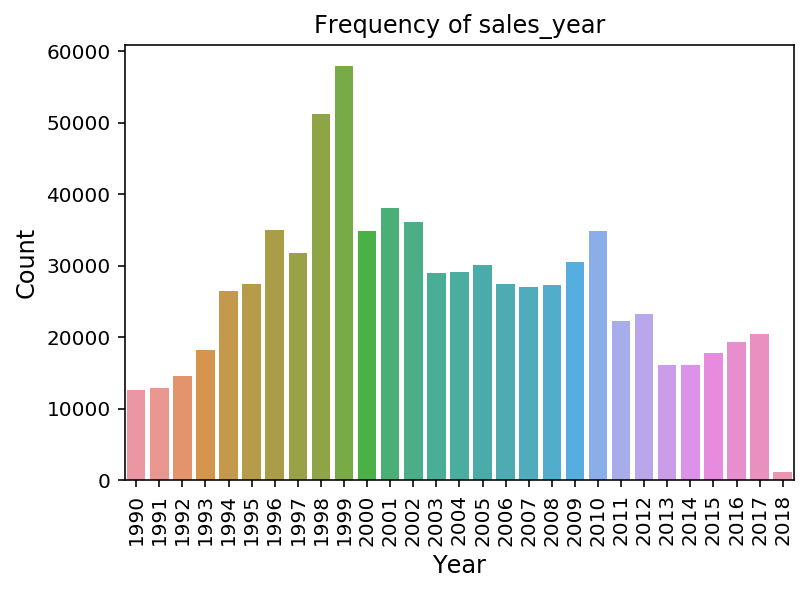

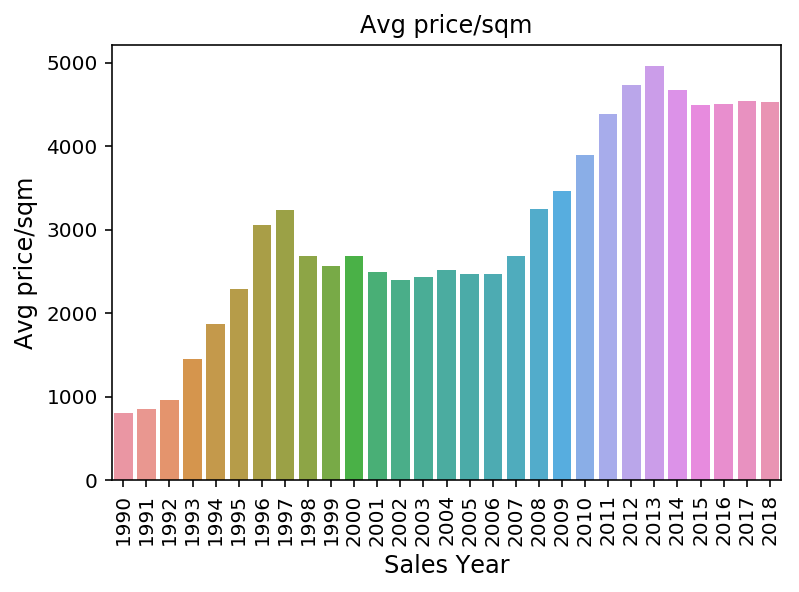

In [8]:
#yearly sales trend

sales_year = np.unique(pd.DatetimeIndex(data['month']).year.values)
year_count = pd.DatetimeIndex(data['month']).year.value_counts()

sns.barplot(year_count.index, year_count.values, order=sales_year)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_year", fontsize=12)
plt.show()
#sales_year_count = (pd.DatetimeIndex(data['month']).year).value_counts()
#print("Sales Year Count \n" +str(sales_year_count))

#sales year vs avg price/sqm
n = len(sales_year)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).year == sales_year[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_year,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- In our dataset, sales rose between 1990 and 1999 and then continuously dropped to around 20,000 in 2017.
- 2018 is included in the dataset, but only contains a small set of instances.
- As expected, in general, prices per sqm increase over time.
- However there was a dip after 1997 and after 2013.
- The data disrtibution hints that there are 3 main phases. The incline from 1990 to 1997, the incline from 1998 to 2013 and the stable phase from 2014 to 2018.

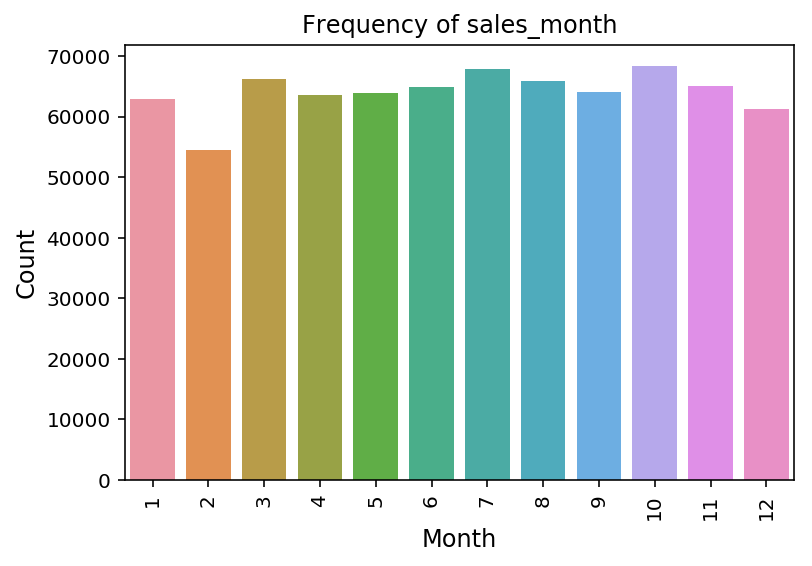

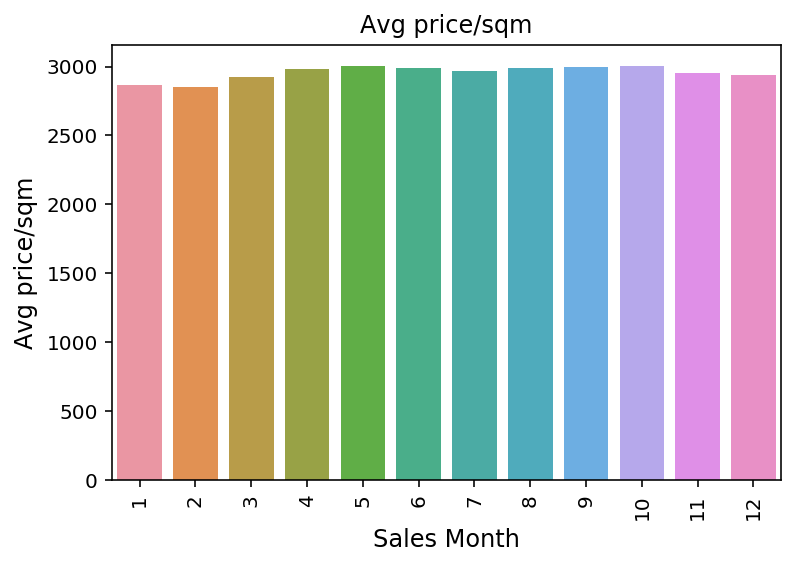

In [9]:
#monthly sales trend

sales_month = np.unique(pd.DatetimeIndex(data['month']).month.values)
month_count = pd.DatetimeIndex(data['month']).month.value_counts()

sns.barplot(month_count.index, month_count.values, order=sales_month)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of sales_month", fontsize=12)
plt.show()
#sales_month_count = (pd.DatetimeIndex(data['month']).month).value_counts()
#print("Sales Month Count \n" +str(sales_month_count))

#sales month vs avg price/sqm
n = len(sales_month)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        sqmm = data['floor_area_sqm'][pd.DatetimeIndex(data['month']).month == sales_month[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(sales_month,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Sales Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- In one month, around 50,000 to 70,000 flats are sold. Sales in February are remarkably lower than in the other months.
- In the months November to March, prices per sqm are a bit lower copared to the rest of the year. <br>

#### 2.2.2 Feature: Lease CommenceYear

The Lease Commence Year is the year in which the lease was commenced and thus, in most cases, also the year in which the building was inaugurated.

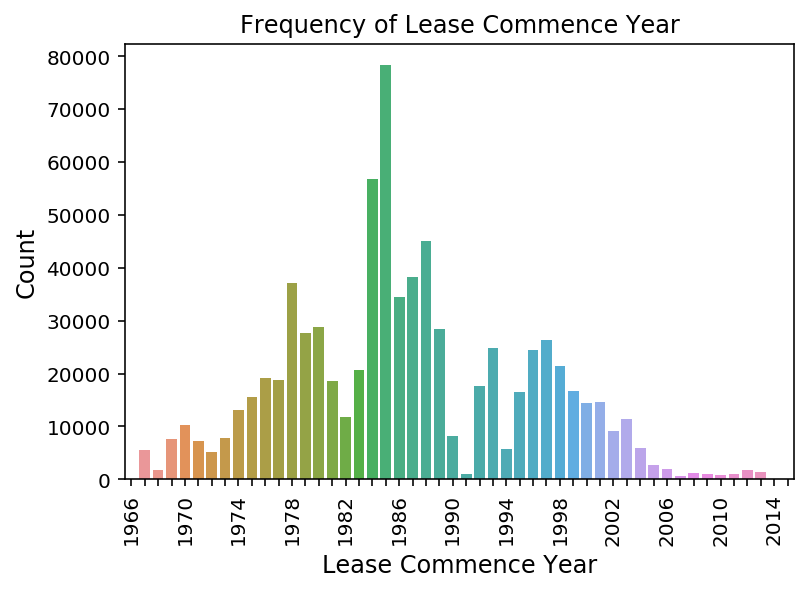

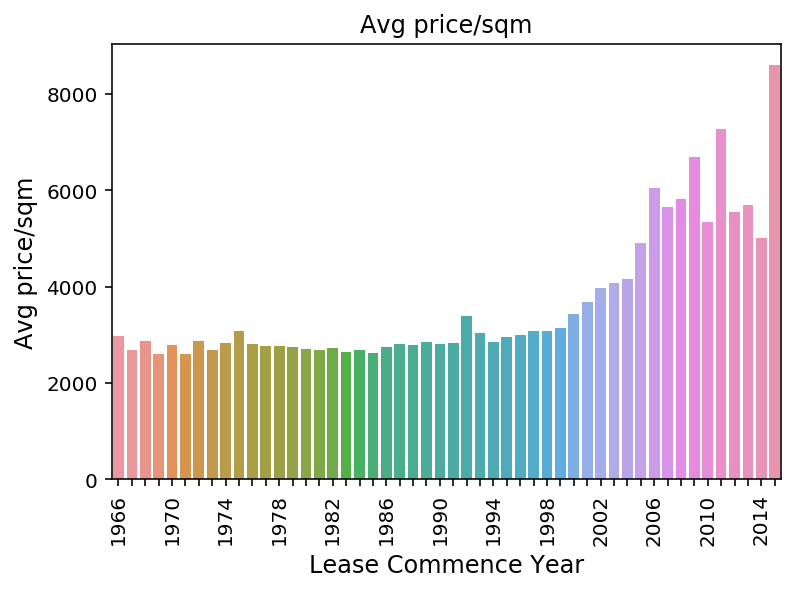

In [10]:
#lease commencement year

lease_commence = np.unique(data['lease_commence_date'])

plot = sns.countplot(x="lease_commence_date", data=data , order = lease_commence)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Lease Commence Year", fontsize=12)

# hide some of the xticks
for label in plot.xaxis.get_ticklabels()[0::1]:
    label.set_visible(False)
for label in plot.xaxis.get_ticklabels()[0::4]:
    label.set_visible(True)

plt.show()
#lease_commence_count = data['lease_commence_date'].value_counts()
#print("Lease Commence Count \n" +str(lease_commence_count))

#town vs avg price/sqm
n = len(lease_commence)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['lease_commence_date'] == lease_commence[i]].sum()
        sqmm = data['floor_area_sqm'][data['lease_commence_date'] == lease_commence[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
plot = sns.barplot(lease_commence,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Lease Commence Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)

# hide some of the xticks
for label in plot.xaxis.get_ticklabels()[0::1]:
    label.set_visible(False)
for label in plot.xaxis.get_ticklabels()[0::4]:
    label.set_visible(True)
    
plt.show()

Observations:
- The years 1984-1989 have the most commencement dates. Before this period, we can observe an increasing trend and afterwards a decreasing trend.
- Prices/sqm remain relatively flat with respect to commencement dates for 1966 to 2000 and increase from 1999 to 2012. Flats with a lease commence date from 2015, have, by far, the highest price per sqm. <br>


#### 2.2.3 Feature: Town

The dataset contains sales of flats from 27 different towns in Singapore.

Total Town Count: 27


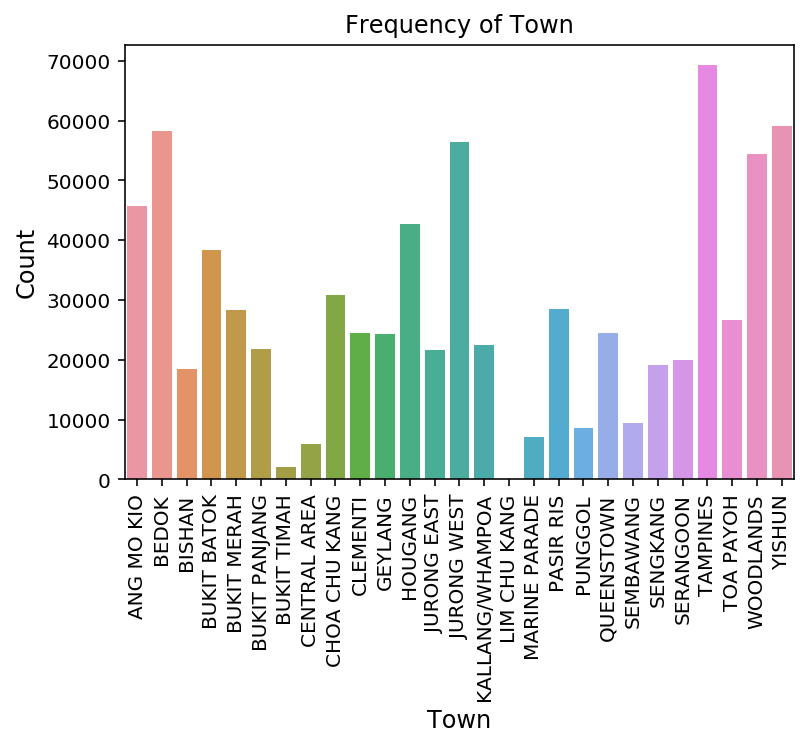

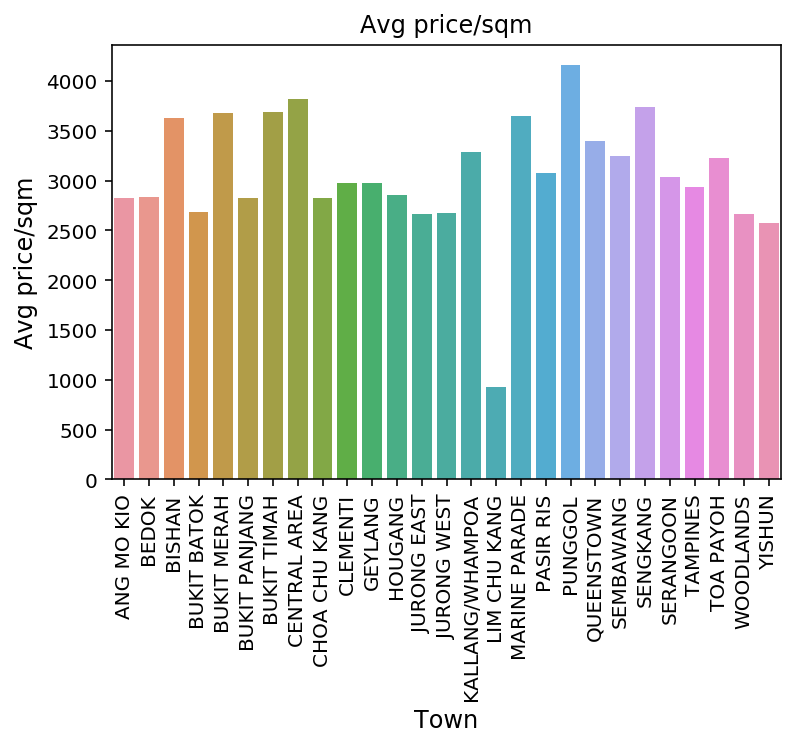

In [11]:
#town count
count_towns = data['town'].nunique()
print("Total Town Count:", count_towns)

town = np.unique(data['town'])

sns.countplot(x="town", data=data , order = town)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Town", fontsize=12)
plt.show()
#towns_count = data['town'].value_counts()
#print("Town Count \n" +str(towns_count))

#town vs avg price/sqm
n = len(town)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['town'] == town[i]].sum()
        sqmm = data['floor_area_sqm'][data['town'] == town[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(town,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Town', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- Besides Bukit Timah and Lim Chu Kang, all towns have more than 5,000 sales occurrences.
- TAMPINES is the most present town, with 69,236 sales.
- Lim Chu Kang is a clear outlier in terms of price/sqm. This is probably due to the low number of only 64 sales registered in that town.
- The most expensive town is Punggol. 

##### Singaporean Townships and Areas
The Housing and Development Board makes a distinction between a total of 23 townships, located in 5 different areas [12]. The areas define their location within the city-state, whereas the township concatenates a community with its own council. The map below highlights the areas and townships. The areas are respectively: north (red), nort-east (yellow), east (blue), central (brown) and west (green). The pins indicate the townships included.

Later on, we will use this information to create an addition feature, called 'town'.

In [49]:
IFrame('https://www.google.com/maps/d/u/0/embed?mid=1Gv4-kVYanSXMj8Q2ldJKJkzTilOlEZxL', width=800, height=300)

#### 2.2.4 Feature: Flat Type

'flat_type' gives basic information about the layout of a flat. In makes a distinction between 1 to 5 rooms, executive or multi-generation.

Total Flat Type Count: 8


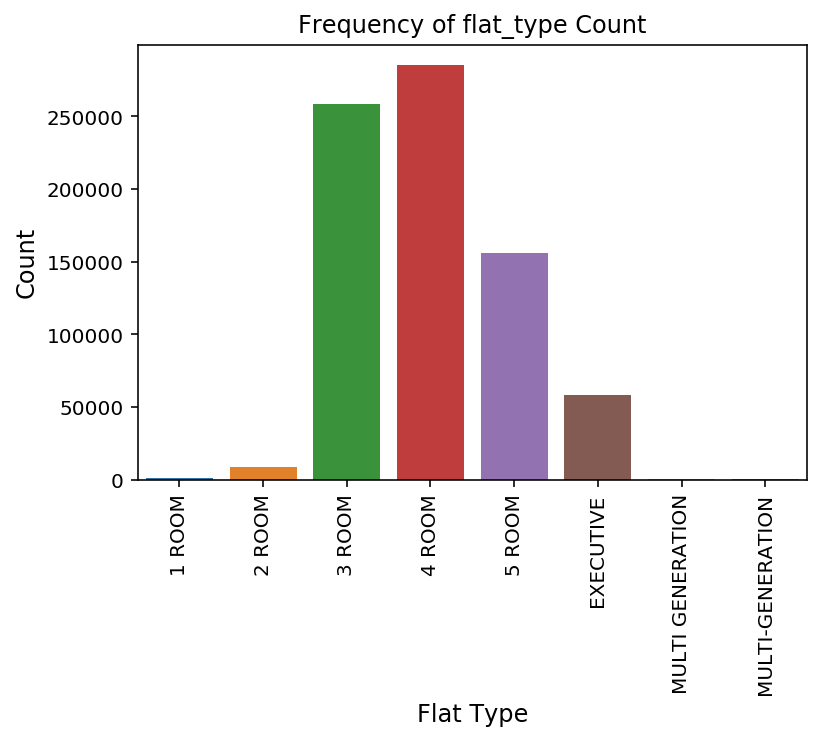

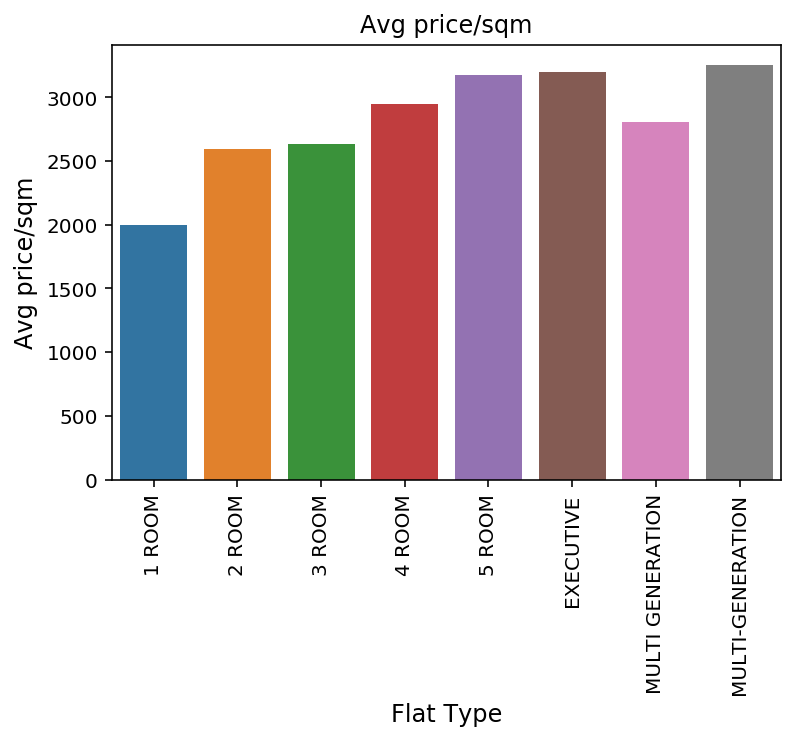

In [13]:
#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type Count \n" +str(flat_type_count))

flat_type = np.unique(data['flat_type'])

sns.countplot(x="flat_type", data=data , order = flat_type)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_type Count", fontsize=12)
plt.show()

#flat type vs avg price/sqm
n = len(flat_type)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_type'] == flat_type[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_type'] == flat_type[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_type,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- There are much fewer 1 Room, 2 Room, and Multi-Generations flats than 3-5 Room and Executive ones.
- The most common flat type is 4 rooms.
- We find the first fault in our dataset: Mulit-Generation has been written in two different ways, once with a dash and once without. We will take care of this in the Data Cleaning part of the file.
- Prices per sqm seem to go up with the number of rooms. <br>

#### 2.2.5 Feature: Flat Model

In contrast to 'flat_type', 'flat_model' is more specifique description of the flat. There are in total 34 different 'flat_model' entries.

Total Flat Model Count: 34


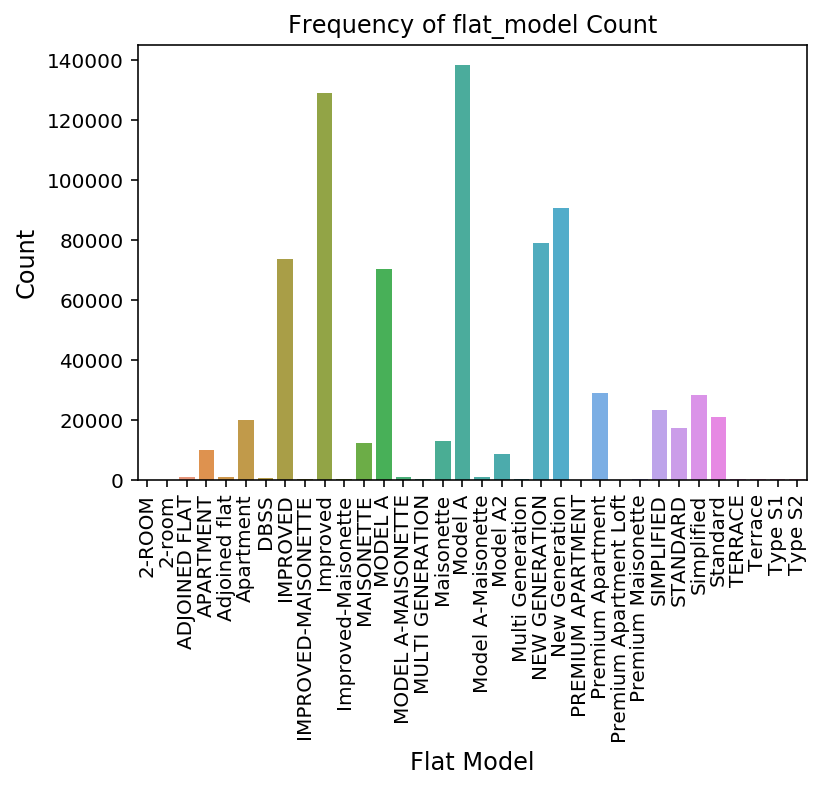

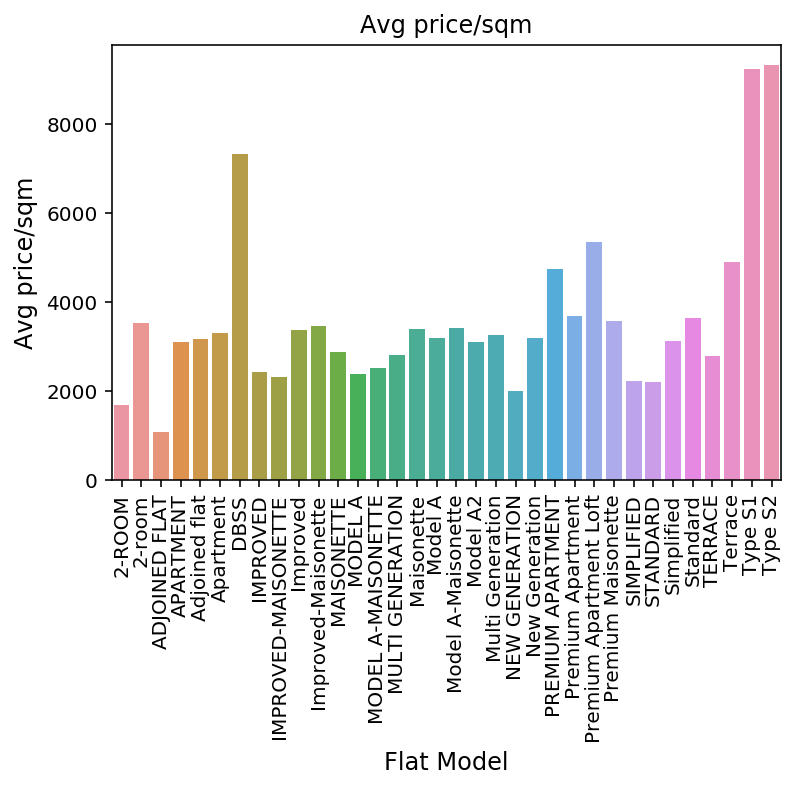

In [14]:
#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

flat_model = np.unique(data['flat_model'])

sns.countplot(x="flat_model", data=data , order = flat_model)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of flat_model Count", fontsize=12)
plt.show()

#flat model vs avg price/sqm
n = len(flat_model)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['flat_model'] == flat_model[i]].sum()
        sqmm = data['floor_area_sqm'][data['flat_model'] == flat_model[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(flat_model,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Flat Model', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Obersvations:
- A lot of 'flat_model' entries exist less than a 1000 times.
- The most common ones are 'Model A' and 'Improved'.
- Prices/sqm vary widely, which is probably due to some sample sizes being very small. <br>

#### 2.2.6 Feature: Storey Range

'storey_range' gives a range of the storey a flat is situated in. Range sizes vary between 3 and 5. There are in total 25 different ranges.

Total Storey Range Count: 25


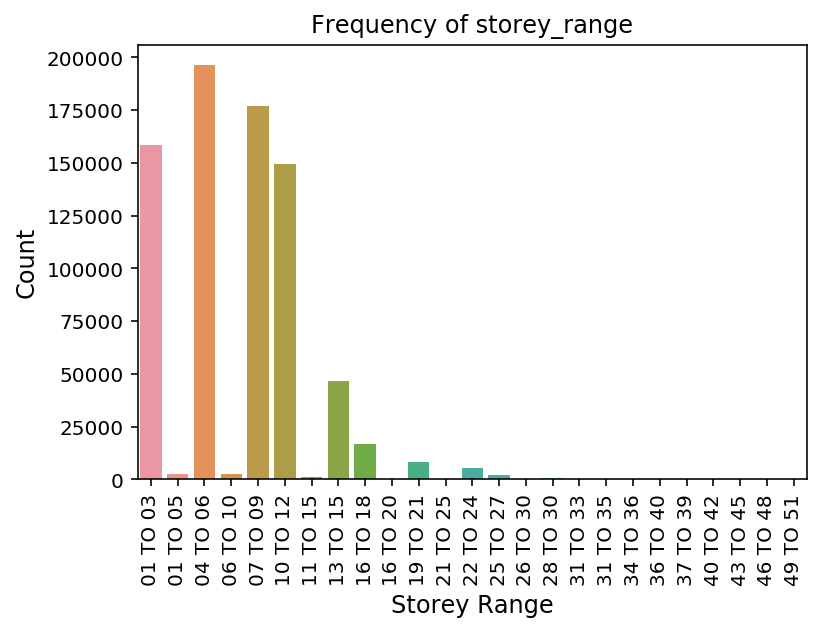

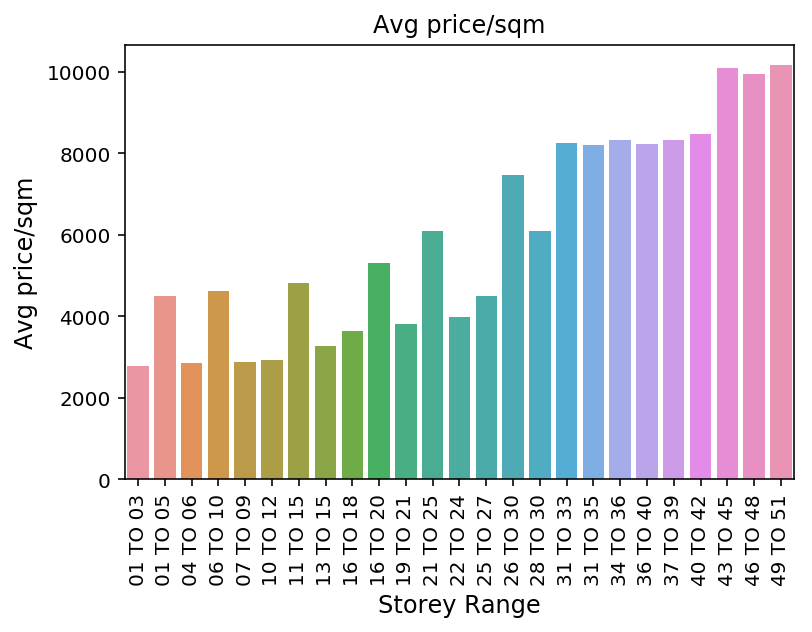

In [15]:
#storey range count
count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
#storey_range_count = data['storey_range'].value_counts()
#print("Storey Range Count \n" +str(storey_range_count))

storey_array = np.unique(data['storey_range'])

sns.countplot(x="storey_range", data=data , order = storey_array)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of storey_range", fontsize=12)
plt.show()

#storey range vs avg price/sqm
n = len(storey_array)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['storey_range'] == storey_array[i]].sum()
        sqmm = data['floor_area_sqm'][data['storey_range'] == storey_array[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
sns.barplot(storey_array,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Storey Range', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- There is a clear upwards trend in price/sqm for higher stories.
- There seems to be an issue with the data: As the sizes of the ranges vary, we get overlaying ranges.
- There are few storey ranges that spike in price. Those ranges are all of size 5. It is possible that the storey ranges of more recent sales are entered in a different format (size of 5 instead of 3) and therefore avg. prices are higher. <br>

#### 2.2.7 Feature: Squared Meters Distribution

Total SQM Range Count: 209


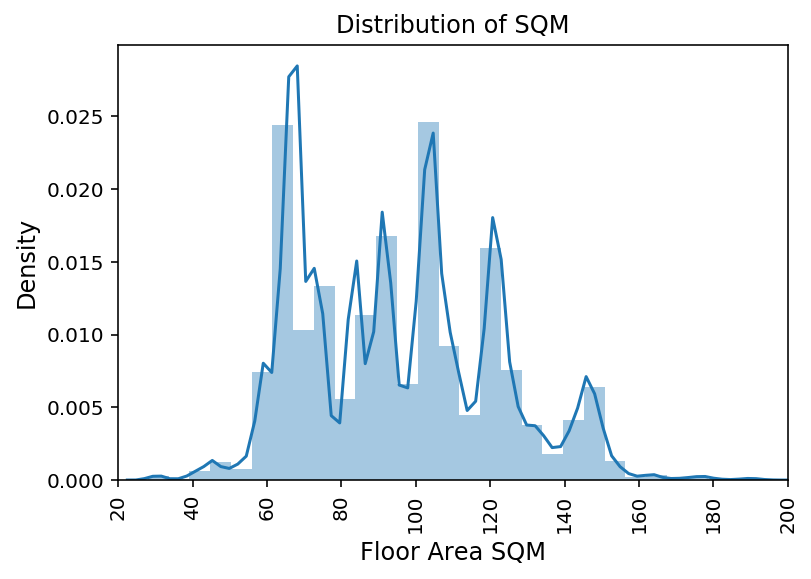

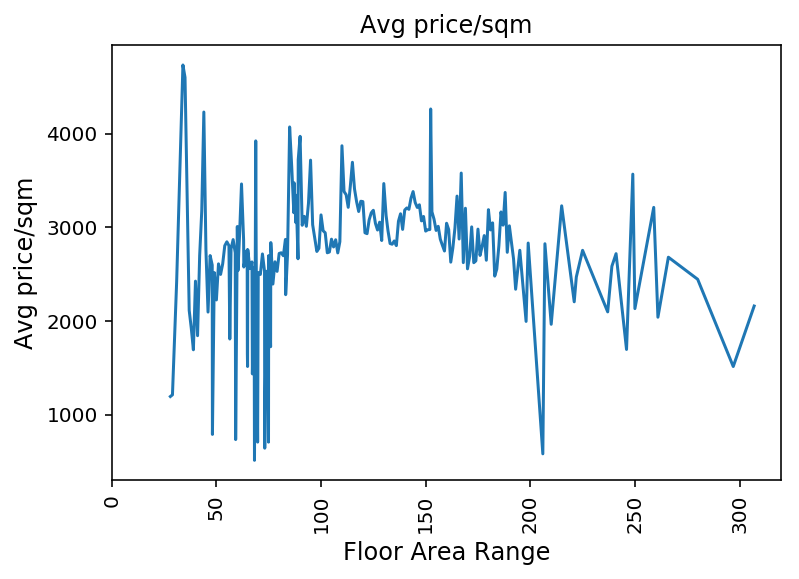

In [19]:
#SQM distribution
count_sqm = data['floor_area_sqm'].nunique()
print("Total SQM Range Count:", count_sqm)
#sqm_count = data['floor_area_sqm'].value_counts()
#print("SQM Range Count \n" +str(sqm_count))

sqm_area = np.unique(data['floor_area_sqm'])

sns.distplot(data['floor_area_sqm'])
plt.ylabel('Density', fontsize=12)
plt.xlabel('Floor Area SQM', fontsize=12)
plt.xlim(20,200)
plt.xticks(rotation='vertical')
plt.title("Distribution of SQM", fontsize=12)
plt.show()


#storey range vs avg price/sqm
n = len(sqm_area)
avg_price = np.zeros(n)

for i in range(0,n):
        price = data['resale_price'][data['floor_area_sqm'] == sqm_area[i]].sum()
        sqmm = data['floor_area_sqm'][data['floor_area_sqm'] == sqm_area[i]].sum()
        priceSQM = price/sqmm
        avg_price[i] = priceSQM
        
plt.plot(sqm_area,avg_price)
plt.ylabel('Avg price/sqm', fontsize=12)
plt.xlabel('Floor Area Range', fontsize=12)
plt.xlim(0,320)
plt.xticks(rotation='vertical')
plt.title("Avg price/sqm", fontsize=12)
plt.show()

Observations:
- We can see that the largest chunk of the HBDs are between 25 and 200 sqm.
- There are a lot of variations in the SQM data. This is probably linked to high degree of planning in Singaporean housing policy. 
- Prices per sqm seem to be highest in the mid-range of SQM. <br>

#### 2.2.8 Feature: Resale Price

Total Resale Price Range Count: 8082


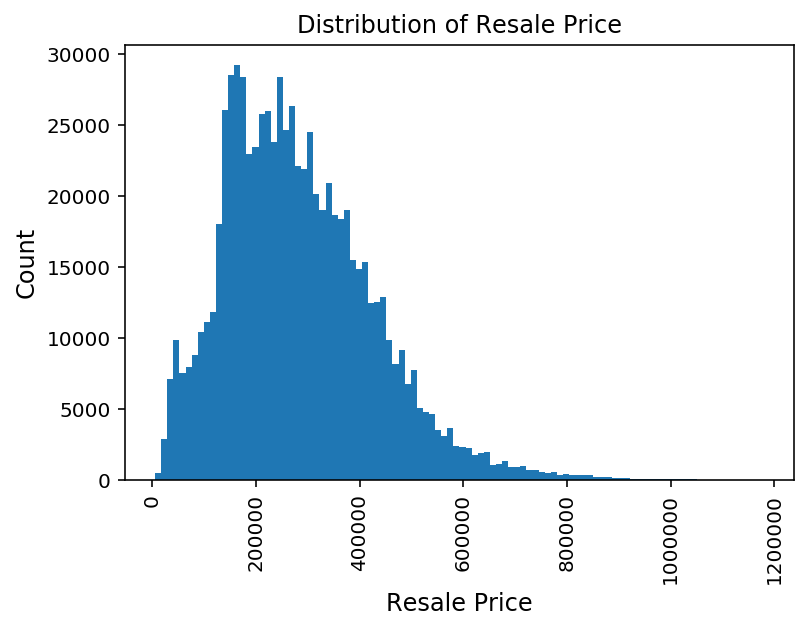

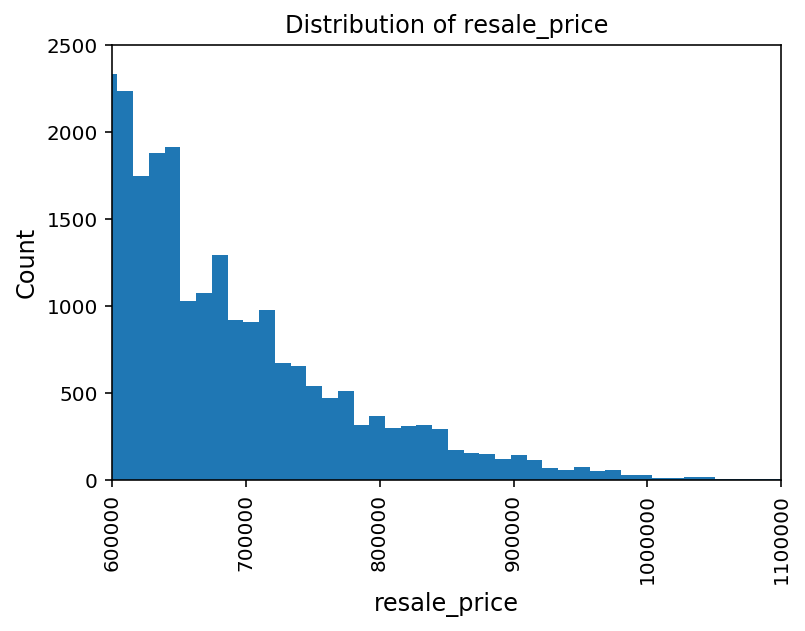

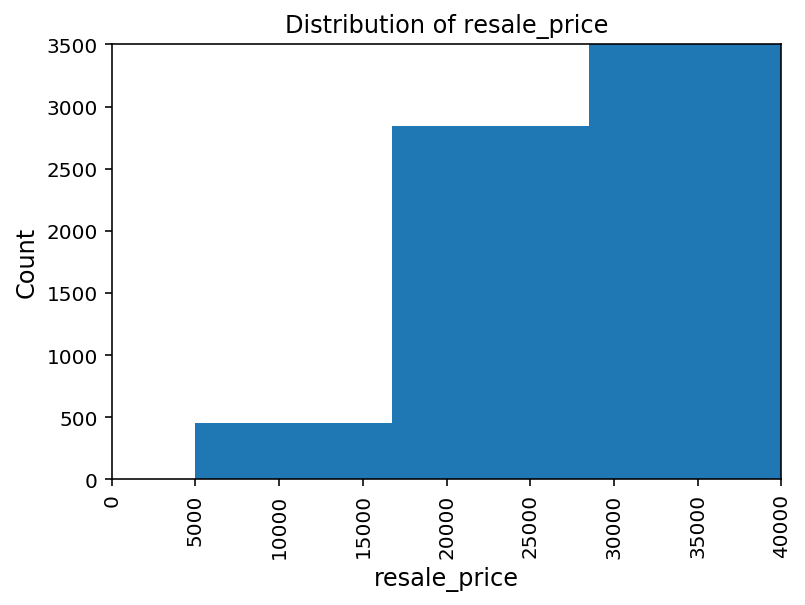

In [17]:
#resale price distribution
count_price = data['resale_price'].nunique()
print("Total Resale Price Range Count:", count_price)
#price_count = data['resale_price'].value_counts()
#print("Resale Price Range Count \n" +str(price_count))

plt.hist(data['resale_price'], bins = 100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Resale Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Resale Price", fontsize=12)
plt.show()

#resale prices above $1,000,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,2500)
plt.xlim(600000,1100000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

#resale prices under $10,000
plt.hist(data['resale_price'], bins=100)
plt.ylabel('Count', fontsize=12)
plt.xlabel('resale_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(0,3500)
plt.xlim(0,40000)
plt.title("Distribution of resale_price", fontsize=12)
plt.show()

Observations:
- Practically no prices per flat go above 1,000,000 SGD.
- The majority of prices are between 150,000 and 400,000 SGD.
- There seems to be a number of flats (400+) that were sold for less than 10,000 SGD. <br>

### 2.3 Correlations

In a further step, we will compare every numerical feature to each other. For this purpose, we will prematurely add some features that we establish in the Feature Engineering part of this document. We will also include correlations to the output, resale_price.

In [47]:
#add sales year variable
if ('sales_year' not in data.columns):
    data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add sales year variable
if ('sales_month' not in data.columns):
    data.insert(1,'sales_month',(pd.DatetimeIndex(data['month']).month))
    
#add sales year variable
if ('month' in data.columns):
    del data['month']
    
#compute remaining lease variable
if ('remaining_lease' not in data.columns):
    data['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

Below, we will visualize correlations between all features using seaborn's joinplot. The plots will also include the Pearson correlation coefficient.

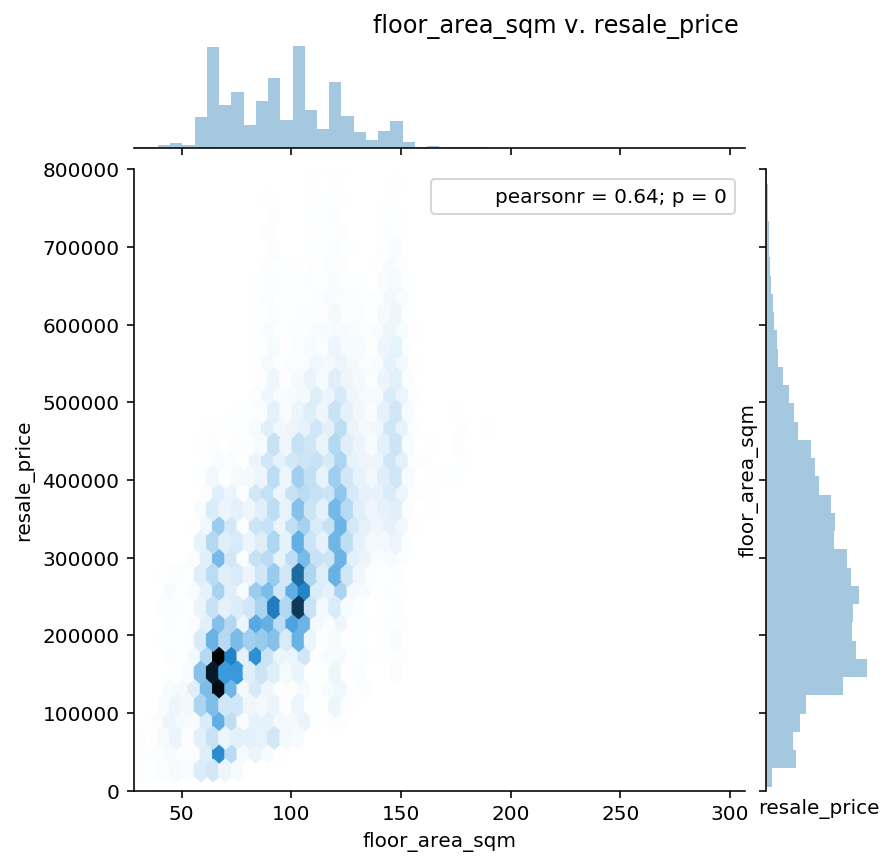

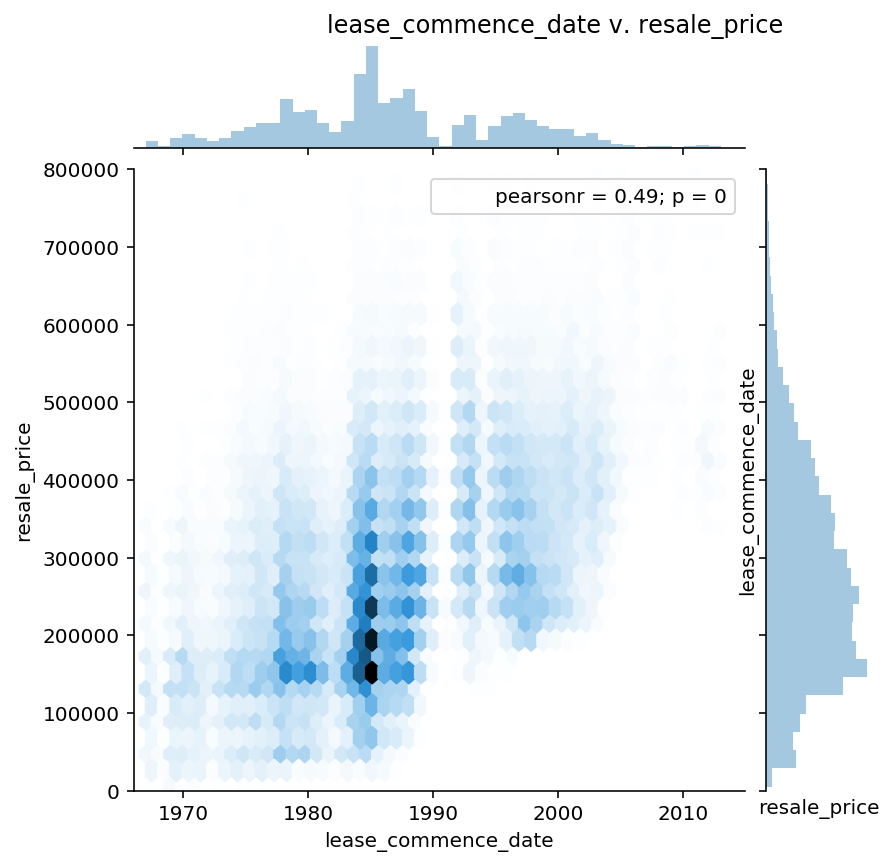

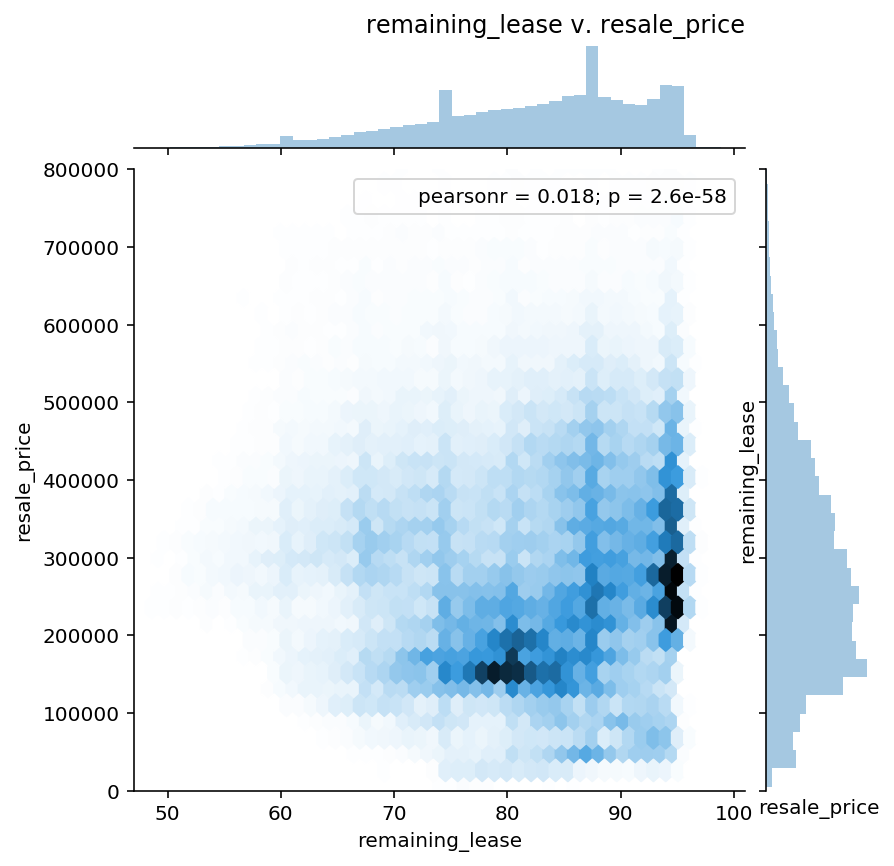

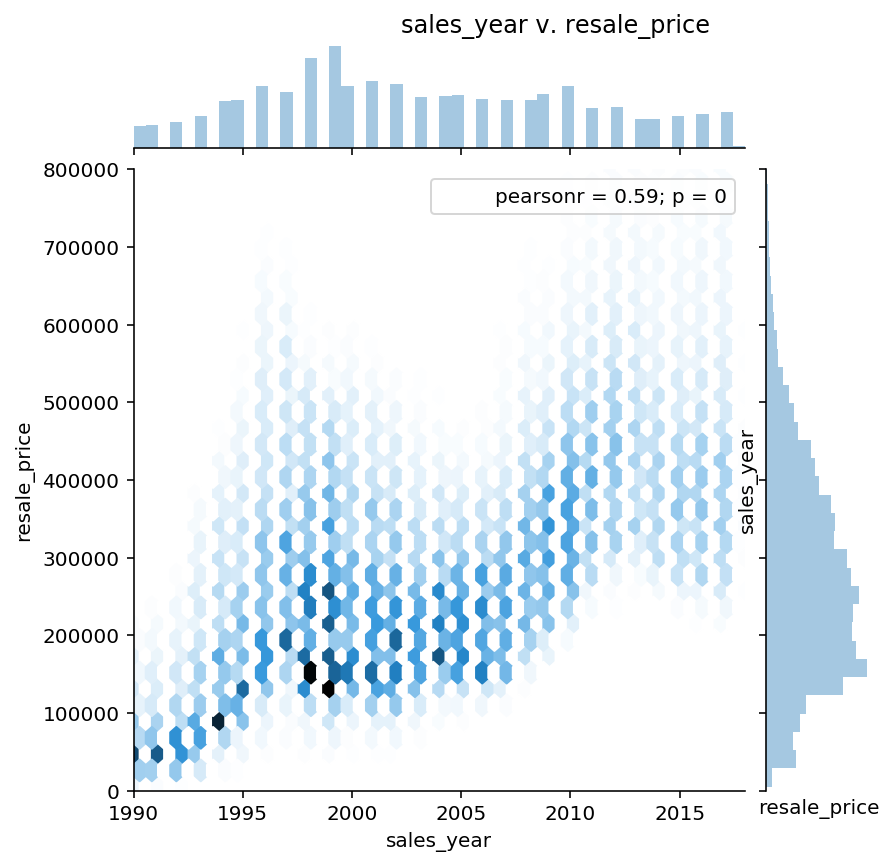

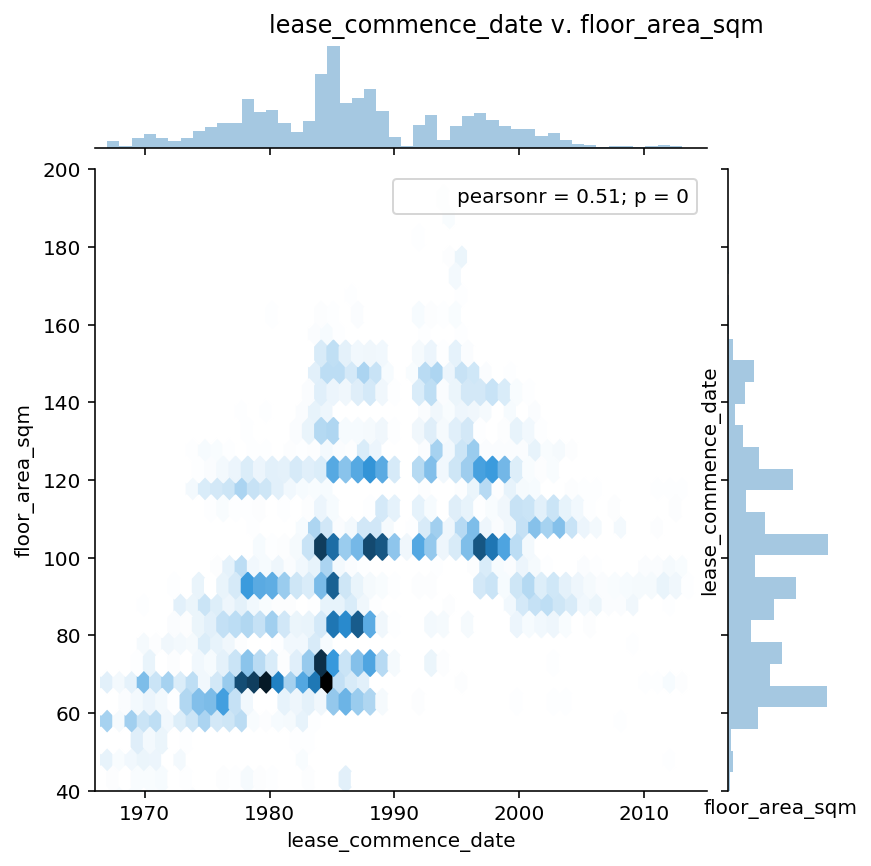

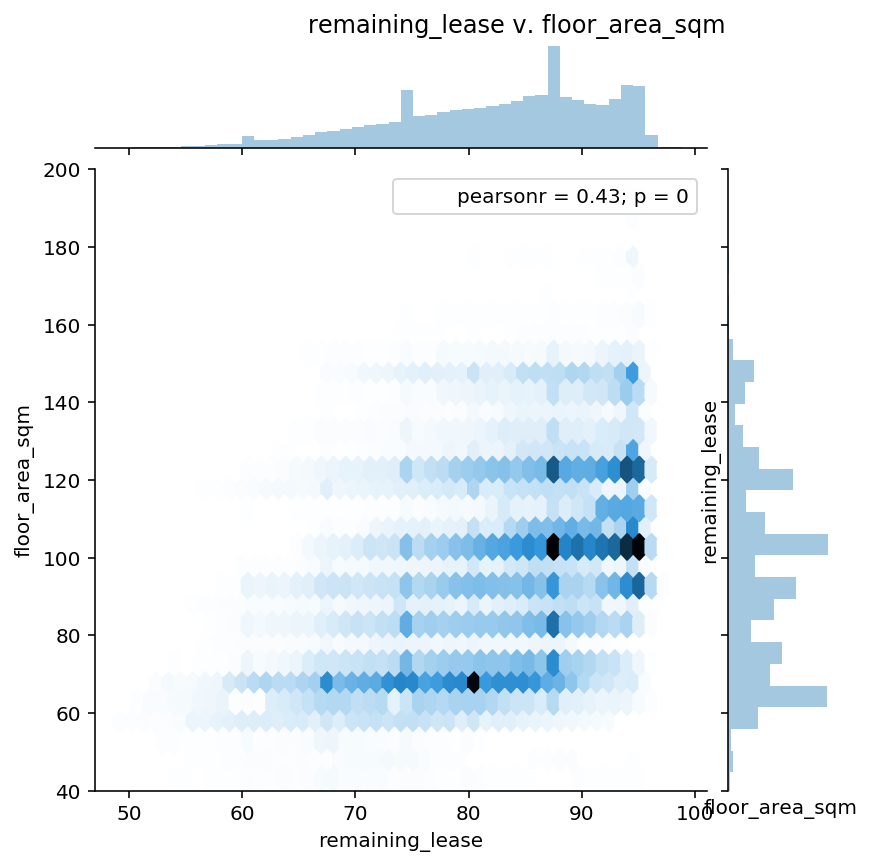

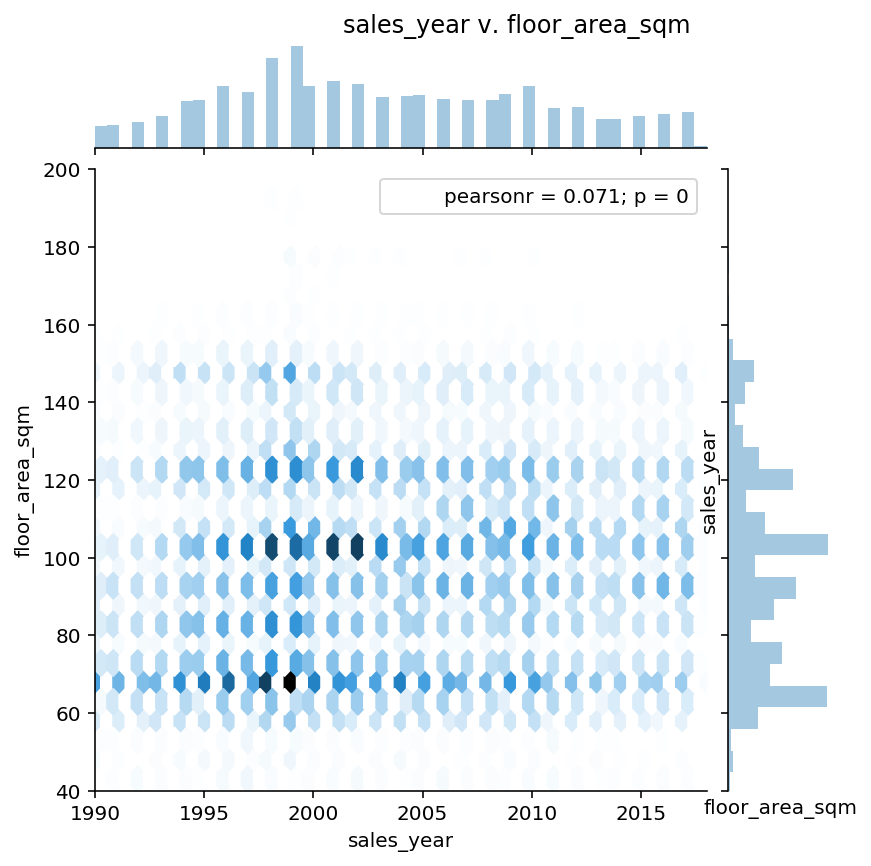

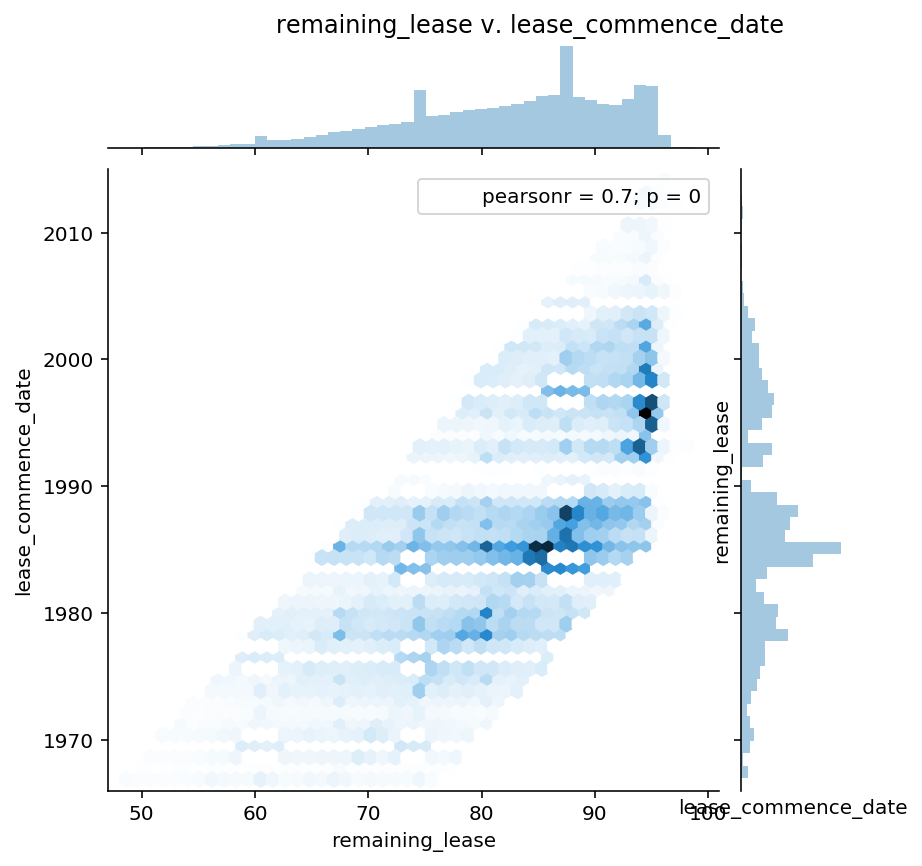

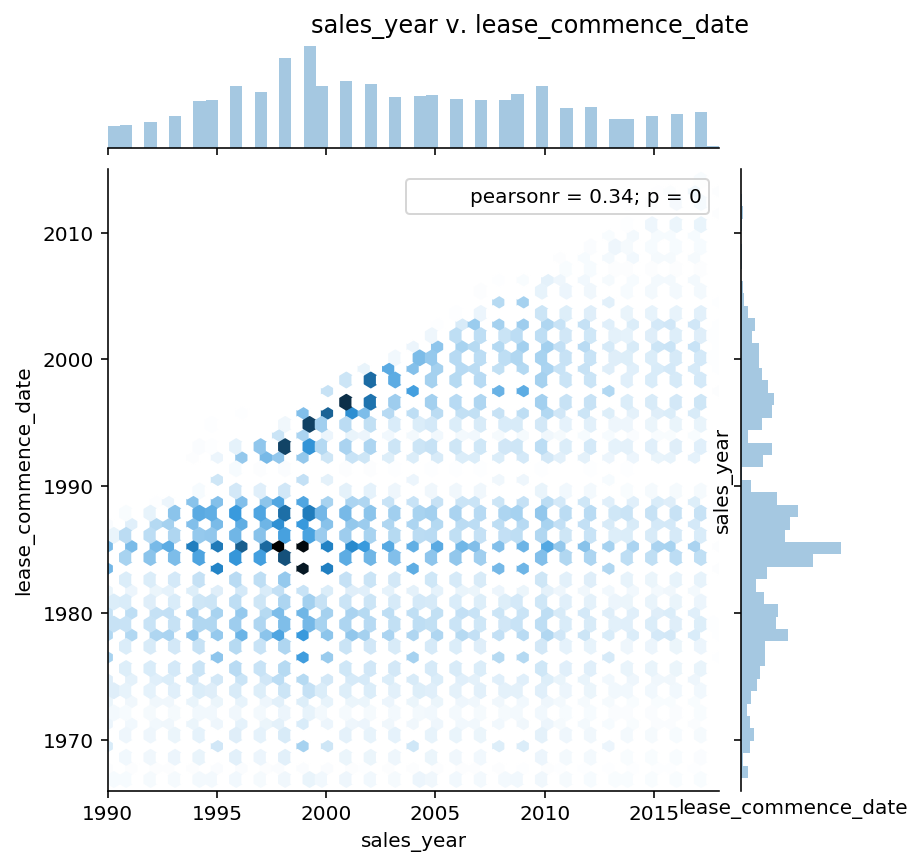

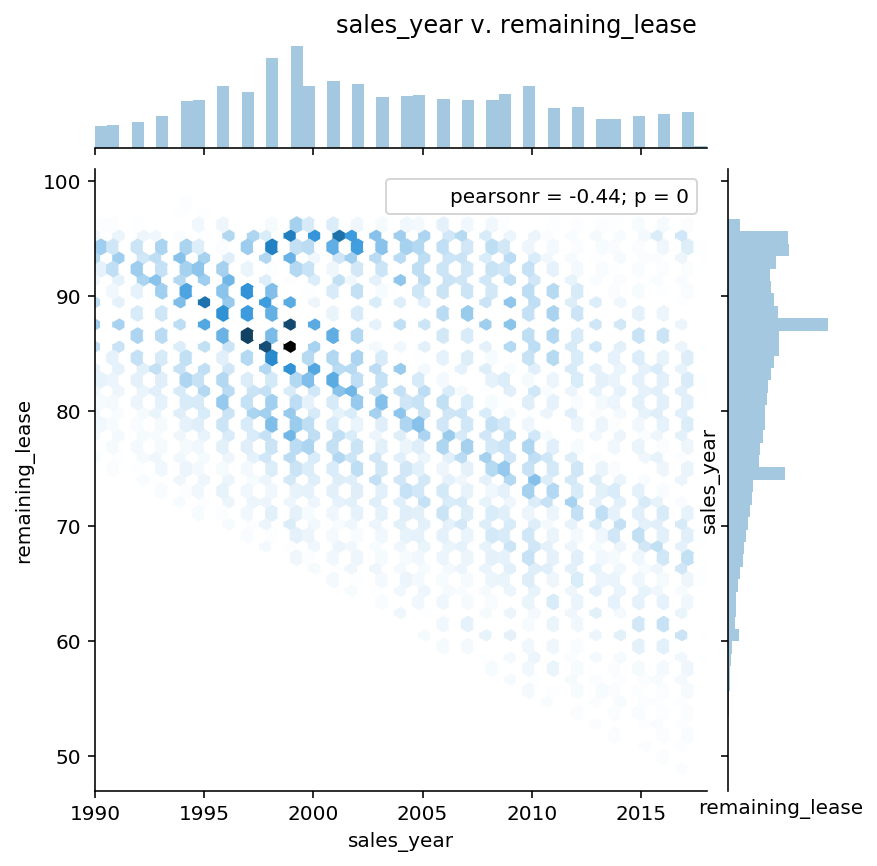

In [48]:
columns = np.array(['resale_price','floor_area_sqm','lease_commence_date','remaining_lease','sales_year'])

for i in range(0,len(columns)):
    inpt1 = columns[i] 
    x1 = data[inpt1]
    for j in range (i+1,len(columns)):
        inpt2 = columns[j]
        x2 = data[inpt2]
        sns.jointplot(data=data, x=x2, y=x1, kind='hex')
        plt.title('%s v. %s'%(inpt2,inpt1), y=1.2, x=-2)
        plt.xlabel('%s'%inpt1)
        plt.ylabel('%s'%inpt2)
        if (inpt1 == 'resale_price'):
            plt.ylim(0,800000)
        elif (inpt1 == 'floor_area_sqm'):
            plt.ylim(40,200)
        plt.show()

One of the plots that show interesting data is the 'floor_area_sqm' vs. 'lease_commence_date':
- There is an upward trend of flat sizes for flats build (lease commence date) from 1966 to 2000.
- This is followed by a downward trend from 2000 to today.
- Indeed, both features are correlated with a coefficient of 0.51
- This finding coincides with official housing planning.

To get a clear oversight of the correlations, we plot a correlation heatmap:

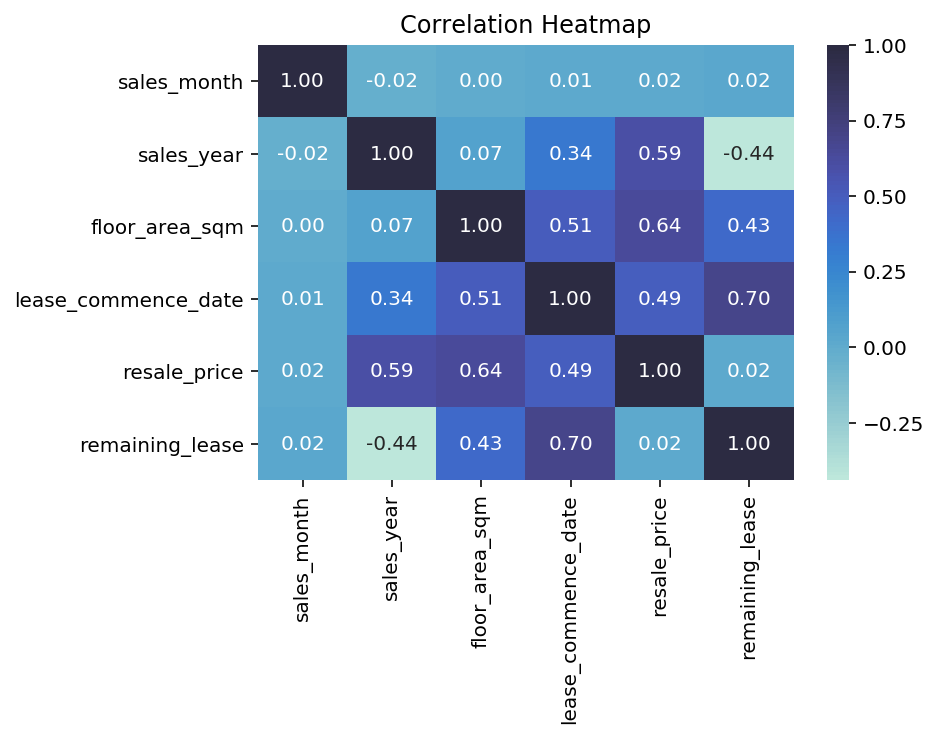

In [37]:
# Correlation heat map
sns.heatmap(data.corr(), annot=True, fmt=".2f",center=1.3)
plt.title('Correlation Heatmap')
plt.show()

Observations:
- Naturally, due the nature of its formula, lease_commence_date is strongly correlated to remaining_lease (0.70).
- Overall, correlations between input features vary between 0 and 0.7. As the pearson coefficien doesn't exceed 0.8, we don't need to worry about any features being too much correlated.
- The features most strongly correlated to the output are floor_area_sqm (0.64) and sales_year (0.59)

## 3 Cleaning and Preprocessing the Dataset
<hr>
The cleaning and preprocessing section are divided into four sections, namely cleaning, encoding, feature engineering and one hot encoding.

### 3.1 Data Cleaning
During the exploration, there are some cleaning that should be performed. First, the flat types consist of eight types, which should be seven types instead. The flat type "Multi Generation" has a unique value with a space in between and one with a hyphen. Second, the flat models consist of 32 models, which should be 21 instead. This is also because of the capital usage. These doubles are removed by cleaning the data. Third, some storey range values in data set 4 are not correct. Linear interpolation was not possible for the storey range, therefore it was divided into two groups, requiring to remove points from the dataset. Fourth, the feature "month" consists of sales year and sales month, e.g. 1990-01. To include the years and months in the model, this variable will be seperated to a variable called sales year and a variable called sales month. 


In [5]:
pd.options.mode.chained_assignment = None #SettingWithCopyWarning for confusing chained assignment disabled

#remove doubles
data['flat_type'][data['flat_type'] == 'MULTI-GENERATION'] = 'MULTI GENERATION'

#flat_type count
count_flat_type = data['flat_type'].nunique()
print("Total Flat Type Count:", count_flat_type)
flat_type_count = data['flat_type'].value_counts()
print("Flat Type \n" +str(flat_type_count))

Total Flat Type Count: 7
Flat Type 
4 ROOM              285136
3 ROOM              258482
5 ROOM              156260
EXECUTIVE            58177
2 ROOM                8859
1 ROOM                1246
MULTI GENERATION       469
Name: flat_type, dtype: int64


In [6]:
#remove doubles
data['flat_model'][data['flat_model'] == 'MODEL A'] = 'Model A'
data['flat_model'][data['flat_model'] == 'IMPROVED'] = 'Improved'
data['flat_model'][data['flat_model'] == 'NEW GENERATION'] = 'New Generation'
data['flat_model'][data['flat_model'] == 'PREMIUM APARTMENT'] = 'Premium Apartment'
data['flat_model'][data['flat_model'] == 'SIMPLIFIED'] = 'Simplified'
data['flat_model'][data['flat_model'] == 'STANDARD'] = 'Standard'
data['flat_model'][data['flat_model'] == 'APARTMENT'] = 'Apertment'
data['flat_model'][data['flat_model'] == 'MAISONETTE'] = 'Maisonette'
data['flat_model'][data['flat_model'] == 'ADJOINED FLAT'] = 'Adjoined flat'
data['flat_model'][data['flat_model'] == 'MODEL A-MAISONETTE'] = 'Model A-Maisonette'
data['flat_model'][data['flat_model'] == 'TERRACE'] = 'Terrace'
data['flat_model'][data['flat_model'] == 'MULTI GENERATION'] = 'Multi Generation'
data['flat_model'][data['flat_model'] == 'IMPROVED-MAISONETTE'] = 'Improved-Maisonette'
data['flat_model'][data['flat_model'] == '2-ROOM'] = '2-room'

#flat_model count
count_flat_model = data['flat_model'].nunique()
print("Total Flat Model Count:", count_flat_model)
flat_model_count = data['flat_model'].value_counts()
print("Flat Model Count \n" +str(flat_model_count))

Total Flat Model Count: 21
Flat Model Count 
Model A                   208633
Improved                  202602
New Generation            169643
Simplified                 51604
Standard                   38234
Premium Apartment          28886
Maisonette                 25136
Apartment                  19745
Apertment                   9901
Model A2                    8382
Adjoined flat               1913
Model A-Maisonette          1784
Terrace                      609
DBSS                         601
Multi Generation             469
Type S1                      183
Improved-Maisonette          105
Type S2                       80
Premium Maisonette            75
2-room                        38
Premium Apartment Loft         6
Name: flat_model, dtype: int64


In [7]:
#remove storey range outliers
#data = data.ix[data['storey_range'].isin(['01 TO 05','06 TO 10','11 TO 15','16 TO 20','21 TO 25','26 TO 30','31 TO 35','36 TO 40'])]
data = data.loc[data['storey_range'].isin(['01 TO 03','04 TO 06','07 TO 09','10 TO 12','13 TO 15','16 TO 18','19 TO 21','22 TO 24','25 TO 27','28 TO 30','31 TO 33','34 TO 36','37 TO 39','40 TO 42','43 TO 45','46 TO 48','49 TO 51'])]

#storey range count
count_storey_range = data['storey_range'].nunique()
print("Total Storey Range Count:", count_storey_range)
storey_range_count = data['storey_range'].value_counts()
print("Storey Range Count \n" +str(storey_range_count))

Total Storey Range Count: 17
Storey Range Count 
04 TO 06    196169
07 TO 09    177012
01 TO 03    158446
10 TO 12    149470
13 TO 15     46780
16 TO 18     16906
19 TO 21      8337
22 TO 24      5233
25 TO 27      2100
28 TO 30       788
34 TO 36       151
31 TO 33       151
37 TO 39       148
40 TO 42        73
43 TO 45        11
46 TO 48        11
49 TO 51         5
Name: storey_range, dtype: int64


In [8]:
#add sales year variable
if ('sales_year' not in data.columns):
    data.insert(1,'sales_year',(pd.DatetimeIndex(data['month']).year))

#add sales year variable
if ('sales_month' not in data.columns):
    data.insert(1,'sales_month',(pd.DatetimeIndex(data['month']).month))
    
#add sales year variable
if ('month' in data.columns):
    del data['month']

Note that two variables are not going to be used, which are respectively block and street name.

In [9]:
#remove unnecessary variables
data = data.drop('block',1)
data = data.drop('street_name',1)

data.head(5)

,sales_month,sales_year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,Improved,1977,9000.0
1,1,1990,ANG MO KIO,1 ROOM,04 TO 06,31.0,Improved,1977,6000.0
2,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,Improved,1977,8000.0
3,1,1990,ANG MO KIO,1 ROOM,07 TO 09,31.0,Improved,1977,6000.0
4,1,1990,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,47200.0


### 3.2 Encoding
When using categorical data, strings are not able to be interpreted by algorithms. Therefore, these values needs to be translated to a numerical value. For example, the towns in the dataset will be translated to $1,2,…,n$. Since there are rows in our dataset containing characters. These rows (town, flat type, flat model and storey range) are transformed into dummy variables to clarify their levels, with other words, to quantify the qualitative data. 

In [10]:
#Note that data.copy() is used to make a copy of data, which will be used for analysis
data_enc = data.copy() 

In [11]:
#dummies for town
town_array = np.unique(data['town'])
n = len(town_array)

for i in range(0,n):
    data_enc['town'][data['town'] == town_array[i]] = i+1

#count_town = data['town'].nunique()
#print("Total Town Count:", count_town)
#town_count = data['town'].value_counts()
#print("Town Count \n" +str(town_count))

In [12]:
#dummies for flat types
data_enc['flat_type'][data.flat_type == '1 ROOM'] = 1
data_enc['flat_type'][data.flat_type == '2 ROOM'] = 2
data_enc['flat_type'][data.flat_type == '3 ROOM'] = 3
data_enc['flat_type'][data.flat_type == '4 ROOM'] = 4
data_enc['flat_type'][data.flat_type == '5 ROOM'] = 5
data_enc['flat_type'][data.flat_type == 'MULTI GENERATION'] = 6
data_enc['flat_type'][data.flat_type == 'EXECUTIVE'] = 7

#flat_type_count = data['flat_type'].value_counts()
#print("Flat Type \n" +str(flat_type_count))

In [13]:
#dummies for storey ranges 
storey_range_array = np.unique(data['storey_range'])
n = len(storey_range_array)

for i in range(0,n):
    data_enc['storey_range'][data['storey_range'] == storey_range_array[i]] = i+1

#count_storey_range = data['storey_range'].nunique()
#print("Total Storey Range Count:", count_storey_range)
#storey_range_count = data['storey_range'].value_counts()
#print("Storey Range Count \n" +str(storey_range_count))

In [14]:
#dummies for flat models
flat_model_array = np.unique(data['flat_model'])
n = len(flat_model_array)

for i in range(0,n):
    data_enc['flat_model'][data['flat_model'] == flat_model_array[i]] = i+1

#count_flat_model = data['flat_model'].nunique()
#print("Total Flat Model Count:", count_flat_model)
#flat_model_count = data['flat_model'].value_counts()
#print("Flat Model Count \n" +str(flat_model_count))

In [15]:
data_enc.tail()

,sales_month,sales_year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
58626,1,2018,27,5,3,122.0,6,1987,490000.0
58627,1,2018,27,5,2,121.0,6,1987,468000.0
58628,1,2018,27,7,3,146.0,8,1987,555000.0
58629,1,2018,27,7,2,146.0,8,1988,550000.0
58630,1,2018,27,7,3,146.0,8,1985,545000.0


### 3.4 One Hot Encoding (Categorical Data)
Label encoding is a traditional way of translating strings into numerical values. The disadvantage of this method is the fact that algorithms might misinterpret these values. A higher town value does not necessarily mean that it has the potential of having higher resale prices.

To cope with this problem, the one hot encoding approach is utilised. Instead of giving a numerical value, new columns are created per feature value. Continuing with the town example, this would mean that every town would have a new column. When the datapoint is part of this value, it will receive a $1$, whilst the other values receive a $0$ in this column. Therefore, it can be considered as a boolean solution for the feature values; either it is part of the value (True) or it is not (False). The disadvantage of the method is the fact that a significant amount of columns will be added to the dataset.

To use the one hot encoding approach, the Panda feature get_dummies is used. This is similar to the LabelBinarizer function used in the Scikit-learn package. We chose for the pandas approach as our data was already converted to a pandas DataFrame. One hot encoding are used for the following features: town/area, flat type, flat model and storey range. 

In [40]:
#Note that data.copy() is used to make a copy of data, which will be used for analysis
data_henc = data.copy()

In [17]:
#one hot encoding for town
dummies = pd.get_dummies(data_henc['town']).rename(columns=lambda x: 'town_' + str(x))
data_henc = pd.concat([data_henc, dummies], axis=1)

In [18]:
#one hot encoding for flat types
dummies = pd.get_dummies(data_henc['flat_type']).rename(columns=lambda x: 'flat_type_' + str(x))
data_henc = pd.concat([data_henc, dummies], axis=1)

#Source: http://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/new/types-of-flats&rendermode=preview

In [19]:
#one hot encoding for storey ranges
dummies = pd.get_dummies(data_henc['storey_range']).rename(columns=lambda x: 'storey_range_' + str(x))
data_henc = pd.concat([data_henc, dummies], axis=1)


In [20]:
#one hot encoding for flat models
dummies = pd.get_dummies(data_henc['flat_model']).rename(columns=lambda x: 'flat_model_' + str(x))
data_henc = pd.concat([data_henc, dummies], axis=1)


In [21]:
#remove unnecessary variables
data_henc = data_henc.drop('town',1)
data_henc = data_henc.drop('flat_type',1)
data_henc = data_henc.drop('storey_range',1)
data_henc = data_henc.drop('flat_model',1)

print(data_henc.shape)

(761791, 77)


In [22]:
data_henc.head(5)

,sales_month,sales_year,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1,1990,31.0,1977,9000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1990,31.0,1977,6000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1990,31.0,1977,8000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1990,31.0,1977,6000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1990,73.0,1976,47200.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 3.4 New Features
In this part, we will explore new features that we can add to make our data more valuable. Since the data consists of seven objects, two floats and one integer, the seven objects will be researched and to see which can and will be changed. (Note that adding and dropping variables have been changed to comments, because an error would pop up otherwise. This is because the variable is already added or dropped, thus it cannot be performed again.) <br>

***Remaining Lease*** The remaining lease is an important argument to consider when buying an appartment. Since this data set provides us with information of the sales year and the lease commence data, the remaining lease years can be calculated. Once the sales year variable is created, the remaining lease year can be computed by using the following formula: $remaining lease year = 99 - (sales year - lease commence date)$.

To check whether the remaining lease variable is correct, the data tail from dataset 5 in the data acquisition is used to compare with the new data. Since only the fifth data set consists of this data, we could use the column for validation. 

In [41]:
#Note that data.copy() is used to make a copy of data, which will be used for analysis
data_f = data_henc.copy()

In [42]:
#compute remaining lease variable
#if ('remaining_lease' not in data_f.columns):
data_f['remaining_lease'] = 99 - (data.sales_year - data.lease_commence_date)

***Longtitude and Latitude*** Another interesting feature would be the longtitude and latitude of the street name. Fortunately, Google has such a package to make this possible. Unfortunately, this is only possible for 2,500 data points per day. Since we have 768.629 data points, this task was not possible for us. However, we still want to show that we have tried running the code underneath. Note that this can be seen as a limitation for our study.

In [25]:
#compute longlat variable
#data['long_lat'] = geocoder.google(data['street_name']).lating

***Area*** Instead of longtitude and latitutde, we have made an extra variable called "Area". The Area captures all the town in a specific region, which is based on the information of the official Singapore government site. 

In [26]:
#Note that data.copy() is used to make a copy of data, which will be used for analysis
data_2f = data_f.copy()

In [27]:
#add area variable
data_2f.insert(1,'area',(data['town']))

In [28]:
#divide towns into areas
data_2f['area'][data_2f.area == 'BUKIT MERAH'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'TOA PAYOH'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'QUEENSTOWN'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'GEYLANG'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'KALLANG/WHAMPOA'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'BISHAN'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'MARINE PARADE'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'CENTRAL AREA'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'BUKIT TIMAH'] = 'CENTRAL'
data_2f['area'][data_2f.area == 'TAMPINES'] = 'NORTH'
data_2f['area'][data_2f.area == 'YISHUN'] = 'NORTH'
data_2f['area'][data_2f.area == 'BEDOK'] = 'NORTH'
data_2f['area'][data_2f.area == 'PASIR RIS'] = 'NORTH'
data_2f['area'][data_2f.area == 'JURONG WEST'] = 'WEST'
data_2f['area'][data_2f.area == 'BUKIT BATOK'] = 'WEST'
data_2f['area'][data_2f.area == 'CHOA CHU KANG'] = 'WEST'
data_2f['area'][data_2f.area == 'CLEMENTI'] = 'WEST'
data_2f['area'][data_2f.area == 'JURONG EAST'] = 'WEST'
data_2f['area'][data_2f.area == 'BUKIT PANJANG'] = 'WEST'
data_2f['area'][data_2f.area == 'WOODLANDS'] = 'EAST'
data_2f['area'][data_2f.area == 'SEMBAWANG'] = 'EAST'
data_2f['area'][data_2f.area == 'LIM CHU KANG'] = 'EAST'
data_2f['area'][data_2f.area == 'ANG MO KIO'] = 'NORTH EAST'
data_2f['area'][data_2f.area == 'HOUGANG'] = 'NORTH EAST'
data_2f['area'][data_2f.area == 'SERANGOON'] = 'NORTH EAST'
data_2f['area'][data_2f.area == 'SENGKANG'] = 'NORTH EAST'
data_2f['area'][data_2f.area == 'PUNGGOL'] = 'NORTH EAST'

area_count = data_2f['area'].value_counts()
print("Area \n" +str(area_count))

#Source: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home

Area 
NORTH         213559
WEST          191750
CENTRAL       158781
NORTH EAST    134634
EAST           63067
Name: area, dtype: int64


In [29]:
#one hot encoding for area
dummies = pd.get_dummies(data_2f['area']).rename(columns=lambda x: 'area_' + str(x))
data_2f = pd.concat([data_2f, dummies], axis=1)

del data_2f['area']

***GDP*** As an emerging market, Singapore went through rapid economic transform since the 1980s [13]. Together with the growth of international trade, and its increased significance in the financial markets. The increase in GDP, and thereby the income of Singaporeans, will likely have an effect on the resale prices of HDB flats.

In [32]:
gdp = pd.read_csv('per-capita-gni-and-per-capita-gdp-at-current-market-prices-in-usd-annual.csv', sep =',')
gdp = gdp.drop('level_1',axis=1)
gdp['sales_year'] = gdp['year']
gdp['gdp_per_capita'] = gdp['value']
del gdp['year']
del gdp['value']
#print(gdp)

In [33]:
data_3f = data_2f.merge(gdp, on='sales_year',how='left')
#data_3f = data_3f.drop_duplicates()

#data_3f = data_2f.copy()
#data_3f['gdp_per_capita'] = 0

#gdp_colums = gdp['gdp_per_capita'].as_matrix
#gdp_colums = np.array(gdp_colums)
#print(gdp_colums[j])
#for i in range(1990,2018):
#    j = i-1990
#    idx = (data_3f['sales_year'] == i)
#    data_3f['gdp_per_capita'][idx] = gdp_colums[j]
    
print(data_3f.shape)
#print(data_3f.describe())

***Land*** Located on the bottom of the Malaysian peninsula, Singapore is a small city-state with limited land mass. Due to this situation, housing prices tend to be higher than for other countries. To cope with the limited amount of land, the government initiated projects to increase the land mass [14]. From the period 1960 until 2018, the land mass of the country increased with 24% from 581.5 sq/km to 721.5 sq/km.

In [34]:
land = pd.read_csv('total-land-area-of-singapore.csv', sep =',')
idx = (land['year'] > 1989)
land = land[idx]
land['sales_year'] = land['year']
del land['year']
#print(land)

In [35]:
data_4f = data_2f.merge(land, on='sales_year',how='left')
#print(data_4f.columns)

***Demand for Rental and Sold Flats*** Besides key metrics regarding the nation’s economy, the Singaporean government also supplies information concerning the demand for rental and sold HDB flats. The data dates back from 1960 until 2016 [15]. This data gives insight in the demand from Singaporeans, and is provided in batches of five years. To work with the data, the average of the five years is included per year.

In [36]:
demand = pd.read_csv('demand-for-rental-and-sold-flats.csv', sep =',')
idx = (demand['sales_year'] > 1989)
demand = demand[idx]
print(demand.columns)
demand = demand.drop(columns=['start_year','end_year','flat_type','demand_for_rental.1'],axis=1)
#print(demand)

Index(['sales_year', 'demand_for_rental', 'demand_for_owner', 'start_year',
       'end_year', 'flat_type', 'demand_for_rental.1'],
      dtype='object')


In [37]:
data_5f = data_2f.merge(demand, on='sales_year',how='left')
#print(data_5f.columns)

In [39]:
data_5f.tail(5)

,sales_month,sales_year,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Type S2,remaining_lease,area_CENTRAL,area_EAST,area_NORTH,area_NORTH EAST,area_WEST,gdp_per_capita,demand_for_rental,demand_for_owner
1502099,1,2018,122.0,1987,490000.0,0,0,0,0,0,...,0,68,0,0,1,0,0,57722,4336.0,27547.0
1502100,1,2018,121.0,1987,468000.0,0,0,0,0,0,...,0,68,0,0,1,0,0,57722,4336.0,27547.0
1502101,1,2018,146.0,1987,555000.0,0,0,0,0,0,...,0,68,0,0,1,0,0,57722,4336.0,27547.0
1502102,1,2018,146.0,1988,550000.0,0,0,0,0,0,...,0,69,0,0,1,0,0,57722,4336.0,27547.0
1502103,1,2018,146.0,1985,545000.0,0,0,0,0,0,...,0,66,0,0,1,0,0,57722,4336.0,27547.0


### 3.5 Normalizations
Data normalization is known as a fundamental preprocessing task to improve the prediction of a model. A normalized dataset might enhances the learning capability with minimum error, since the quality of the data is guaranteed before using any learning algorithm. The data will be scaled in the same range of values for the input features to minize bias [16]. We are using this technique as well to research if this method might improve our scores, since the input are on widely different scales. Two different types of normalization will be used, respectively Z-scoring and Max/Min normalization.

#### 3.5.1 Z-scoring
Z-scoring normalizes the values of the features according to the mean and standard deviation.

In [30]:
data_z = data_2f.copy()

In [31]:
# z-scoring
data_z[['sales_month', 'sales_year','floor_area_sqm','remaining_lease','lease_commence_date']] = (data_z[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']] - data_z[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']].mean())/data_z[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']].std()


#### 3.5.2 Max/Min-Normalization
This method normalizes the values of the features according to the minimum and maximum of these values. 

In [32]:
data_n = data_2f.copy()

In [33]:
# max/min
data_n[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']] = (data_n[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']] - data_n[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']].min())/(data_n[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']].max() - data_n[['sales_month', 'sales_year', 'floor_area_sqm','remaining_lease','lease_commence_date']].min())


### 3.6 Additional One Hot Encoding (Discrete Values)

In [34]:
data_henc_2 = data_2f.copy()

In [35]:
#one hot encoding for sales_year
dummies = pd.get_dummies(data_henc_2['sales_year']).rename(columns=lambda x: 'sy_' + str(x))
data_henc_2 = pd.concat([data_henc_2, dummies], axis=1)

#one hot encoding for sales_month
dummies = pd.get_dummies(data_henc_2['sales_month']).rename(columns=lambda x: 'sm_' + str(x))
data_henc_2 = pd.concat([data_henc_2, dummies], axis=1)

#one hot encoding for lease_commence_date
dummies = pd.get_dummies(data_henc_2['lease_commence_date']).rename(columns=lambda x: 'lcd_' + str(x))
data_henc_2 = pd.concat([data_henc_2, dummies], axis=1)

In [36]:
data_henc_2 = data_henc_2.drop(columns=['sales_year','sales_month','lease_commence_date'],axis=1)

In [37]:
print(data_henc_2.shape)

(761791, 171)


## 4 Data Analysis
<hr>
This part of the report will show algorithms that have been applied to predict the housing prices. We have focused on regressions with different features. This section will first define all the models that will be used and afterwards the results of applying the models to the different scenarios.

### 4.1 Models
In our data analysis, we used different techniques to predict the future resale price. First, the linear regression is discussed. Afterwards, two ensemble learning techniques are introduced. To cover the scope of ensembling, we will  both use a bagging and boosting technique. The random forest bagging technique is introduced first, before moving to the gradient boosting technique. To complete the analysis, and compare the predictive functions, we also introduce the neural network prediction. This is done to validate the research objective of this study.

#### Linear Regression
Linear regression is one of the most common used modeling technique where the dependent variable is continuous and the independent variables can be either continuous or discrete [21]. Since our dataset has the same setting, this technique is used as one of the possible models.

In [38]:
# Linear Regression
def lin_reg(data,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_lin_reg = LinearRegression()
    model_lin_reg.fit(x_train, y_train)
    y_pred_l = model_lin_reg.predict(x_test)
    #y_pred_l_train = model_Forest.predict(x_train)
    
    mae_l = mean_absolute_error(y_test, y_pred_l)
    #mae_l_train = mean_absolute_error(y_train, y_pred_l_train)
    print("\nMAE for Linear Regression is: %.0f"%mae_l)
    #print("For the train set: %.0f" %mae_l_train)

    cdf_l = r2_score(y_test, y_pred_l)
    print('R-squared for Random Forest: %.2f' % cdf_l)
    
    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        model_lin_reg_cv = LinearRegression()
        scores_lr = cross_val_score(model_lin_reg_cv, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores_lr = - scores_lr
        print(scores_lr)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))
    
    
    print('LR Time = %.0f'%(time.time() - start))

#### Random Forest
Random Forest is a learning technique that is part of the bootstrap aggregating techniques, also known as bagging. The technique can be utilised for both classification and regression problems. However, [19] notes that in case of overfitting data, the random forest will make it even worse. However, when there are enough trees in the forest, the classifier will not easily overfit the model. [20] describe random forests as multiple decision trees that are being merged, resulting in a more accurate and stable prediction. 

In [39]:
# Run Random Forest
def random_f(data,version,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_Forest = RandomForestRegressor()
    model_Forest.fit(x_train, y_train)
    y_pred_f = model_Forest.predict(x_test)
    #y_pred_f_train = model_Forest.predict(x_train)
    
    mae_f = mean_absolute_error(y_test, y_pred_f)
    #mae_f_train = mean_absolute_error(y_train, y_pred_f_train)
    print("\nMAE for Random Forest is: %.0f"%mae_f)
    #print("For the train set: %.0f" %mae_f_train)
    
    cdf_f = r2_score(y_test, y_pred_f)
    print('R-squared for Random Forest: %.2f' % cdf_f)

    if (version == 1):
        importances = model_Forest.feature_importances_
        indices = np.argsort(importances)[::-1]
        columns = np.array(list(data_input))
        return importances
        
        # Print the feature ranking
        print("\nFeature ranking:")
        
        for f in range(x_train.shape[1]):
            print("%d. %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
        
    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        scores_rf = cross_val_score(model_Forest, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores_rf = - scores_rf
        print(scores_rf)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))
    
    print('RF Time = %.0f'%(time.time() - start))

#### Gradient Boosting Regressor
Gradient boosting is a machine learning technique for both regression and classification problems [17]. The algorithm is able to produce a decision tree based on input data. Boosting is an ensemble technique, where the predictors are not made independently, but sequentially [18]. By including this algorithm, we perform two types of ensembling in our analysis: bagging (random forest) and boosting (gradient boosting).

In terms of gradient boosting, we apply three different techniques. The first technique is the standard gradient boosting regressor and the latter two are based on the technique with tweaks in the learning process.

In [40]:
# Run GradientBoostingRegressor
def gbr(data,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_gbr = GradientBoostingRegressor()
    model_gbr.fit(x_train, y_train)
    y_pred_gbr = model_gbr.predict(x_test)
    
    mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
    print("\nMean Absolute Error for GradientBoostingRegressor is: %.0f" %mae_gbr) 

    cdf_gbr = r2_score(y_test, y_pred_gbr)
    print('R-squared for GradientBoostingRegressor: %.2f' % cdf_gbr)

    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        scores_gbr = cross_val_score(model_gbr, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores_gbr = - scores_gbr
        print(scores_gbr)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores_gbr.mean(), scores_gbr.std() * 2))
     
    print('GBR Time = %.0f'%(time.time() - start))

#### Ada Boost

In [41]:
# Run AdaBoost
def ada(data,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_abr = AdaBoostRegressor()
    model_abr.fit(x_train, y_train)
    y_pred_abr = model_abr.predict(x_test)
    
    mae_abr = mean_absolute_error(y_test, y_pred_abr)
    print("\nMean Absolute Error for AdaBoost is: %.0f" %mae_abr)
    
    cdf_abr = r2_score(y_test, y_pred_abr)
    print('R-squared for AdaBoost: %.2f' % cdf_abr)
 
    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        scores_ada = cross_val_score(model_abr, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores_ada = - scores_ada
        print(scores_ada)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores_ada.mean(), scores_ada.std() * 2))
    
    print('Ada Time = %.0f'%(time.time() - start))


#### XG Boost

In [42]:
# Run XG Boost
def xg_boost(data,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)
    
    dtrain = xgb.DMatrix(x_train, label = y_train)
    dtest = xgb.DMatrix(x_test, label = y_train)
    param = {
        'max_depth': 3,  # the maximum depth of each tree. Try with max_depth: 2 to 10.
        'eta': 0.3,  # the training step for each iteration. Try with ETA: 0.1, 0.2, 0.3...
        'silent': 1,  # logging mode - quiet
        'objective': 'reg:linear'}  # defines the loss function to be minimized  
    num_round = 20  # the number of training iterations. Try with num_round around few hundred!
    #----------------
    bst = xgb.train(param, dtrain, num_round)
    y_pred_xgb = bst.predict(dtest)
    best_preds = np.asarray([np.argmax(line) for line in y_pred_xgb])

    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    print("\nMean Absolute Error for XGBoost is: %.0f" %mae_xgb)
    #xgb.plot_importance(bst)
    #plt.show()

    cdf_xgb = r2_score(y_test, y_pred_xgb)
    print('R-squared for XGBoost: %.2f' % cdf_xgb)
    
    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        scores_xgb = cross_val_score(xgb.train, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores_xgb = - scores_xgb
        print(scores_xgb)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores_xgb.mean(), scores_xgb.std() * 2))
    
    print('XGB Time = %.0f'%(time.time() - start))

#### Neural Network
Predictive Neural Network is a powerful predictive modeling technique, which can learn to perform predictive tasks. It can for example be trained to predict numerical values, such as housing prices. As mentioned in the introduction, previous studies showed that this technique might perform better compared to a regression model. However, since Singapore is a quasi-open market, Neural Network is used to research if this is the case.

In [43]:
# Neural Network
def neural(data,cv):
    start = time.time()
    
    data_input = data.drop('resale_price' ,axis=1)
    data_output = data['resale_price']
    x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.33, random_state=42)

    model_n = MLPRegressor()
    model_n.fit(x_train, y_train)
    y_pred_n = model_n.predict(x_test)
    
    mae_n = mean_absolute_error(y_test, y_pred_n)
    print("\nMean Absolute Error for Neural Network is: %.0f" %mae_n)  
    
    cdf_n = r2_score(y_test, y_pred_n)
    print('R-squared for Neural Network: %.2f' % cdf_n)
    
    if (cv == 1):
        cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)
        scores = cross_val_score(model_n, data_input, data_output, cv=cv, scoring='neg_mean_absolute_error')
        scores = - scores
        print(scores)
        print("CV MAE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    print('Neural Time = %.0f'%(time.time() - start))

### 4.2 Analysis
The analysis section will show the Mean Absolute Error and R-squared of every model with different scenarios. 

***Mean Absolute Error***

Formula: <br>
$$MAE = \frac{1}{n}\sum_{j=1}^{n}|y_j - \hat{y}_j|$$

***Coefficient of Determination***
The coefficient of determination, also known as $R^2$, is the proportion variance between the dependent variable and the prediction from the independent variable. This coefficient ranges from 0 to 1, where 1 means that there is no variance between the predicted and actual.

Formula:<br> 
$$R^2 = 1 - \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$$

where $y$ is the actual value, $\hat{y}$ is the predicted value of y, and $\bar{y}$ is the mean value of y.

#### Scenario 1: Only data encoding
Some columns are still of 'object' type and need to be changed to int or float in order to run XGBoost.

In [44]:
#print(data_enc.dtypes)
data_enc['flat_type'] = pd.to_numeric(data_enc['flat_type'])
data_enc['storey_range'] = pd.to_numeric(data_enc['storey_range'])
data_enc['flat_model'] = pd.to_numeric(data_enc['flat_model'])
data_enc['town'] = pd.to_numeric(data_enc['town'])
print(data_enc.dtypes)

sales_month              int64
sales_year               int64
town                     int64
flat_type                int64
storey_range             int64
floor_area_sqm         float64
flat_model               int64
lease_commence_date      int64
resale_price           float64
dtype: object


To quickly different algorithms and features, we use a sample size of the full train data.<br>

In [70]:
#data_sample = data_enc.sample(frac=0.1)

In [45]:
lin_reg(data_enc,1)
random_f(data_enc,0,1)
gbr(data_enc,1)
lin_reg(data_enc,0)
random_f(data_enc,0,0)
gbr(data_enc,0)
xg_boost(data_enc,0)
neural(data_enc,0)
#xg_boost(data_enc,0)
neural(data_enc,0)


MAE for Linear Regression is: 54119
R-squared for Random Forest: 0.73
[ 54119.46444219  54365.60006966  54093.46602506]
CV MAE: 54192.84 (+/- 245.24)
LR Time = 2

MAE for Random Forest is: 15957
R-squared for Random Forest: 0.97
[ 15986.23194421  16026.6271082   15992.92784481]
CV MAE: 16001.93 (+/- 35.35)
RF Time = 111

Mean Absolute Error for GradientBoostingRegressor is: 28375
R-squared for GradientBoostingRegressor: 0.91
[ 28374.54980786  28518.24146692  28730.38520083]
CV MAE: 28541.06 (+/- 292.32)
GBR Time = 290


/Users/meijunyeh/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Mean Absolute Error for Neural Network is: 71341
R-squared for Neural Network: 0.52
Neural Time = 933


In [46]:
ada(data_enc,0)


Mean Absolute Error for AdaBoost is: 78036
R-squared for AdaBoost: 0.59
Ada Time = 55


In [48]:
ada(data_henc,0)


Mean Absolute Error for AdaBoost is: 79460
R-squared for AdaBoost: 0.58
Ada Time = 335


In [47]:
ada(data_f,0)
ada(data_2f,0)
#ada(data_3f,0)
#ada(data_4f,0)
#ada(data_5f,0)
ada(data_z,0)
ada(data_n,0)
ada(data_henc_2,0)
#ada(data_r,0)


Mean Absolute Error for AdaBoost is: 79226
R-squared for AdaBoost: 0.58
Ada Time = 461

Mean Absolute Error for AdaBoost is: 77135
R-squared for AdaBoost: 0.61
Ada Time = 366

Mean Absolute Error for AdaBoost is: 75663
R-squared for AdaBoost: 0.63
Ada Time = 371

Mean Absolute Error for AdaBoost is: 77430
R-squared for AdaBoost: 0.61
Ada Time = 361

Mean Absolute Error for AdaBoost is: 96751
R-squared for AdaBoost: 0.36
Ada Time = 872


NameError: name 'data_r' is not defined

In [53]:
lin_reg(data_enc,0)
random_f(data_enc,0,0)
gbr(data_enc,0)
xg_boost(data_enc,0)
neural(data_enc,0)


MAE for Linear Regression is: 54119
LR Time = 1

MAE for Random Forest is: 15928
R-squared for Random Forest: 0.97
RF Time = 22

Mean Absolute Error for GradientBoostingRegressor is: 28375
R-squared for GradientBoostingRegressor: 0.91
GBR Time = 55

Mean Absolute Error for XGBoost is: 32849
R-squared for XGBoost: 0.89
XGB Time = 7


/Users/maximekayser/miniconda3/envs/kkbox/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Mean Absolute Error for Neural Network is: 71294
R-squared for Neural Network: 0.52
Neural Time = 700


#### Scenorio 2: Analysis on one hot encoding

In [54]:
#data_sample = data_henc.sample(frac=0.1)

In [56]:
lin_reg(data_henc,1)
random_f(data_henc,0,1)
gbr(data_henc,1)
xg_boost(data_henc,0)
neural(data_henc,0)


MAE for Linear Regression is: 47967
[47967.02983397 48127.11958318 48000.19519511]
CV MAE: 48031.45 (+/- 137.98)
LR Time = 12

MAE for Random Forest is: 15837
R-squared for Random Forest: 0.97
[15872.37484185 15894.65156278 15879.80407021]
CV MAE: 15882.28 (+/- 18.52)
RF Time = 231

Mean Absolute Error for GradientBoostingRegressor is: 28961
R-squared for GradientBoostingRegressor: 0.91
[28960.66594965 28974.37466018 28802.14909249]
CV MAE: 28912.40 (+/- 156.31)
GBR Time = 576

Mean Absolute Error for XGBoost is: 32464
R-squared for XGBoost: 0.89
XGB Time = 33


/Users/maximekayser/miniconda3/envs/kkbox/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Mean Absolute Error for Neural Network is: 60630
R-squared for Neural Network: 0.67
Neural Time = 1196


#### Scenario 3: Analysis on one new feature (remaining lease)

In [57]:
#data_sample = data_f.sample(frac=0.1)

In [59]:
lin_reg(data_f,1)
random_f(data_f,0,1)
gbr(data_f,0)
xg_boost(data_f,0)
#neural(data_f,0)


MAE for Linear Regression is: 47969
[47969.3995192  48135.37643306 47996.2386813 ]
CV MAE: 48033.67 (+/- 145.49)
LR Time = 13

MAE for Random Forest is: 15860
R-squared for Random Forest: 0.97
[15830.5479533  15888.5815834  15880.77066558]
CV MAE: 15866.63 (+/- 51.43)
RF Time = 237

Mean Absolute Error for GradientBoostingRegressor is: 28812
R-squared for GradientBoostingRegressor: 0.91
GBR Time = 143

Mean Absolute Error for XGBoost is: 32985
R-squared for XGBoost: 0.89
XGB Time = 42


Scores improved and thus we will keep this feature.

#### Scenario 4: Analysis on two new features (remaining lease and area)

In [ ]:
#data_sample = data_2f.sample(frac=0.1)

In [60]:
lin_reg(data_2f,1)
random_f(data_2f,0,1)
gbr(data_2f,0)
xg_boost(data_2f,0)
#neural(data_2f,0)


MAE for Linear Regression is: 47966
[47966.48386755 48108.3148957  47999.56919301]
CV MAE: 48024.79 (+/- 121.17)
LR Time = 11

MAE for Random Forest is: 15722
R-squared for Random Forest: 0.97
[15747.55492464 15783.24222303 15756.76507508]
CV MAE: 15762.52 (+/- 30.25)
RF Time = 203

Mean Absolute Error for GradientBoostingRegressor is: 26157
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 167

Mean Absolute Error for XGBoost is: 29446
R-squared for XGBoost: 0.91
XGB Time = 36


#### Scenario 5: Analysis on three new features (remaining lease, area and GDP per capita)

In [ ]:
#data_sample = data_3f.sample(frac=0.1)

In [56]:
lin_reg(data_3f,1)
random_f(data_3f,0,1)
gbr(data_3f,0)
xg_boost(data_3f,0)
#neural(data_3f,0)


MAE for Linear Regression is: 41710
[41709.81807569 41789.78347847 41786.46454736]
CV MAE: 41762.02 (+/- 73.88)
LR Time = 17

MAE for Random Forest is: 15748
R-squared for Random Forest: 0.97
[15755.05462834 15780.40619586 15753.52505029]
CV MAE: 15763.00 (+/- 24.65)
RF Time = 294

Mean Absolute Error for GradientBoostingRegressor is: 26074
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 231

Mean Absolute Error for XGBoost is: 29181
R-squared for XGBoost: 0.91
XGB Time = 40


#### Scenario 6: Analysis on three new features (remaining lease, area, GDP per capita and land)

In [ ]:
#data_sample = data_4f.sample(frac=0.1)

In [67]:
lin_reg(data_4f,1)
random_f(data_4f,0,0)
gbr(data_4f,0)
xg_boost(data_4f,0)
#neural(data_4f,0)


MAE for Linear Regression is: 42056
[42056.04079386 42176.7166746  42125.85056879]
CV MAE: 42119.54 (+/- 98.94)
LR Time = 22

MAE for Random Forest is: 15705
R-squared for Random Forest: 0.97
RF Time = 86

Mean Absolute Error for GradientBoostingRegressor is: 26157
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 235

Mean Absolute Error for XGBoost is: 29446
R-squared for XGBoost: 0.91
XGB Time = 49


#### Scenario 7: Analysis on four new features (remaining lease, area, GDP per capita, land and demand)

In [68]:
#data_sample = data_5f.sample(frac=0.1)

In [69]:
lin_reg(data_5f,1)
random_f(data_5f,0,0)
gbr(data_5f,0)
xg_boost(data_5f,0)
#neural(data_5f,0)


MAE for Linear Regression is: 46704
[46703.83493288 46893.45372113 46752.97704243]
CV MAE: 46783.42 (+/- 160.70)
LR Time = 20

MAE for Random Forest is: 15732
R-squared for Random Forest: 0.97
RF Time = 68

Mean Absolute Error for GradientBoostingRegressor is: 26143
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 244

Mean Absolute Error for XGBoost is: 29479
R-squared for XGBoost: 0.91
XGB Time = 44


#### Scenario 8: Analysis on Normalization Data

In [70]:
#data_sample = data_z.sample(frac=0.1)

In [71]:
print('\n### z-scoring ###')
lin_reg(data_z,1)
random_f(data_z,0,0)
gbr(data_z,0)
xg_boost(data_z,0)
#neural(data_z,0)


### z-scoring ###

MAE for Linear Regression is: 47972
[47972.10958953 48130.8384843  48054.9764296 ]
CV MAE: 48052.64 (+/- 129.64)
LR Time = 18

MAE for Random Forest is: 15706
R-squared for Random Forest: 0.97
RF Time = 76

Mean Absolute Error for GradientBoostingRegressor is: 26157
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 219

Mean Absolute Error for XGBoost is: 29446
R-squared for XGBoost: 0.91
XGB Time = 39


#### Scenario 9: Analysis on max-min normalization data

In [122]:
#data_sample = data_n.sample(frac=0.1)

In [72]:
print('\n### max/min ###')
lin_reg(data_n,1)
random_f(data_n,0,10)
gbr(data_n,0)
xg_boost(data_n,0)
#neural(data_n,0)


### max/min ###

MAE for Linear Regression is: 47968
[47968.39755414 48126.22632486 47998.00459271]
CV MAE: 48030.88 (+/- 137.00)
LR Time = 15

MAE for Random Forest is: 15717
R-squared for Random Forest: 0.97
RF Time = 71

Mean Absolute Error for GradientBoostingRegressor is: 26157
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 191

Mean Absolute Error for XGBoost is: 29446
R-squared for XGBoost: 0.91
XGB Time = 38


nothing happened

#### Scenario 10: Addition One hot Encoding of Months and Years

In [ ]:
#data_sample = data_henc_2.sample(frac=0.1)

In [73]:
lin_reg(data_henc_2,1)
random_f(data_henc_2,0,0)
gbr(data_henc_2,0)
xg_boost(data_henc_2,0)
#neural(data_henc_2,0)


MAE for Linear Regression is: 29559
[29559.25088125 29637.64522922 29643.32786804]
CV MAE: 29613.41 (+/- 76.73)
LR Time = 33

MAE for Random Forest is: 16045
R-squared for Random Forest: 0.97
RF Time = 151

Mean Absolute Error for GradientBoostingRegressor is: 36117
R-squared for GradientBoostingRegressor: 0.87
GBR Time = 279

Mean Absolute Error for XGBoost is: 44152
R-squared for XGBoost: 0.81
XGB Time = 69


### 4.3 Reduced Features

In [52]:
data_r = data_4f.copy()

In [57]:
data_sample = data_r.sample(frac=0.1)

By checking the importances of the different features in our most performing algorithm, Random Forrest, we can to select a batch of features to remove in order to try to get a better prediction. 

In [58]:
importances = random_f(data_sample,1,0)


MAE for Random Forest is: 19364
R-squared for Random Forest: 0.96

Feature ranking:
1. floor_area_sqm (0.317082)
2. sales_year (0.304229)
3. total_land_area (0.153145)
4. flat_type_4 ROOM (0.067800)
5. area_CENTRAL (0.047803)
6. flat_type_EXECUTIVE (0.018013)
7. lease_commence_date (0.014877)
8. remaining_lease (0.011082)
9. sales_month (0.010068)
10. flat_type_5 ROOM (0.005827)
11. area_EAST (0.003597)
12. town_CLEMENTI (0.002844)
13. storey_range_01 TO 03 (0.002789)
14. town_TAMPINES (0.002503)
15. area_WEST (0.002324)
16. town_JURONG WEST (0.002010)
17. town_ANG MO KIO (0.001984)
18. flat_model_Adjoined flat (0.001428)
19. town_GEYLANG (0.001348)
20. town_BEDOK (0.001309)
21. flat_model_Simplified (0.001296)
22. flat_model_Model A (0.001270)
23. town_SERANGOON (0.001261)
24. storey_range_04 TO 06 (0.001247)
25. storey_range_07 TO 09 (0.001121)
26. flat_model_Terrace (0.001060)
27. storey_range_10 TO 12 (0.001054)
28. town_WOODLANDS (0.000991)
29. area_NORTH EAST (0.000975)
30. town

Let's try removing all features with an importance inferior to 0.00005. This corresponds to removing around 10-20 of the least important features.

In [59]:
#indices = np.argsort(importances)[::-1]
columns = np.array(list(data_r.drop('resale_price',1)))

for i in range(0,len(columns)):
    feature = columns[i]
    weight = importances[i]
    if (weight < 0.00005):
        del data_r[feature]
        
print(data_r.shape)

(761791, 69)


In [60]:
lin_reg(data_r,0)
random_f(data_r,0,0)
gbr(data_r,0)
xg_boost(data_r,0)
#neural(data_r,0)


MAE for Linear Regression is: 42081
LR Time = 3

MAE for Random Forest is: 15715
R-squared for Random Forest: 0.97
RF Time = 53

Mean Absolute Error for GradientBoostingRegressor is: 26077
R-squared for GradientBoostingRegressor: 0.93
GBR Time = 164

Mean Absolute Error for XGBoost is: 29446
R-squared for XGBoost: 0.91
XGB Time = 32


Deleting any features with low importance did not increase nor decrease the results. The results stayed approximately the same.

### 4.4 Split Datasets according to Periods

Following our assumption in the previous chapter, we also try to run the regressions on seperate datasets to research whether the accuracy will increase.

Looking at the average price per square meter in the sales years, periods can be identified. The first period identified is the economic growth from 1990 until 1997 [13]. The "Asian Crisis" of 1997-1998 affected Singapore and other emerging markets, which is visible from the decline in resale price in the data [14]. In the subsequent years, Singapore had a stable growth in economic terms, but coped with the economic slowdown in the US, Japan and the EU. Combined with the SARS outbreak in 2003, the resale prices remained relatively stable until 2007. According to [15], the HDB resale prices from 2007 onwards grew even faster than the private property market. [15] argues that the increase in price is the result of an increase in median income of Singaporeans. 


Splitting the dataset in these periods could help to predict the resale prices of HDB in Singapore. We thereby assume that the resale prices of data in the first period (i.e. 1990-1997) will be less accurate to predict the resale price in 2018. This is based on both economic motives, as well as demographic motives (e.g. increased population and land mass).

In [61]:
# Creating the datasets based on the periods described
data_period1 = data_2f.loc[data['sales_year'].isin(['1990','1991','1992','1993','1994','1995','1996','1997','1998'])]
data_period2 = data_2f.loc[data['sales_year'].isin(['1999','2000','2001','2002','2003','2004','2005','2006','2007'])]
data_period3 = data_2f.loc[data['sales_year'].isin(['2008','2009','2010','2011','2012','2013''2014','2015','2016','2017','2018'])]


In [62]:
#data_sample_p1 = data_period1.sample(frac=0.1)
#data_sample_p2 = data_period2.sample(frac=0.1)
#data_sample_p3 = data_period3.sample(frac=0.1)


In [63]:
periods = [data_period1,data_period2,data_period3]
for i in range(0,3):
    period = periods[i]
    print(period.shape)

(230238, 83)
(309490, 83)
(189870, 83)


In [64]:
period_names = ['1990-1998','1999-2007','2008-2018']

for i in range(0,3):
    print('\n### For',period_names[i],'###')
    period = periods[i]
    lin_reg(period,0)
    random_f(period,0,0)
    gbr(period,0)
    xg_boost(period,0)
    #neural(period,0)


### For 1990-1998 ###

MAE for Linear Regression is: 37646
[37645.59562511 37771.4501507  37752.62042143]
CV MAE: 37723.22 (+/- 110.85)
LR Time = 4

MAE for Random Forest is: 13961
R-squared for Random Forest: 0.98
[13931.58408913 13991.30023272 13998.45339202]
CV MAE: 13973.78 (+/- 59.96)
RF Time = 48

Mean Absolute Error for GradientBoostingRegressor is: 18658
R-squared for GradientBoostingRegressor: 0.96
GBR Time = 35

Mean Absolute Error for XGBoost is: 21115
R-squared for XGBoost: 0.95
XGB Time = 10

### For 1999-2007 ###

MAE for Linear Regression is: 23391
[23391.09155877 23454.90744018 23356.78017331]
CV MAE: 23400.93 (+/- 81.32)
LR Time = 5

MAE for Random Forest is: 13116
R-squared for Random Forest: 0.96
[13110.18374223 13083.14130265 13077.92125586]
CV MAE: 13090.42 (+/- 28.28)
RF Time = 68

Mean Absolute Error for GradientBoostingRegressor is: 18880
R-squared for GradientBoostingRegressor: 0.92
GBR Time = 57

Mean Absolute Error for XGBoost is: 20570
R-squared for XGBoost

In [67]:
overall_mae = (13973.78*230238 + 13090.42*309490 + 21155.30*189870)/(230238+309490+189870)
print('Overall Mean Absolute Error for RF: %.0f' % overall_mae)

overall_rsq = (0.98*230238 + 0.96*309490 + 0.94*189870)/(230238+309490+189870)
print('Overall R-squared for RF: %.2f' % overall_rsq)

Overall Mean Absolute Error for RF: 15468
Overall R-squared for RF: 0.96


Splitting the datasets in 3 parts yields better predictions for the phases 1990-1998 and 1999-2007. The error of predictions for the most recent phase, 2008-2018, increasing a lot however. Despite this, the weighted average of the MAE decreases by a factor of around 300 and thus we can conclude that splitting the data into time-based subsets helps to increase our prediction slightly.

## 5 Conclusions, Limitations & Future Research
<hr>
The objective of this study was the validation if a regression model would be sufficient in a market regulated by the government. To test this hypotheses, we used extensive datasets on resale prices of HDB flats in Singapore. First, the datasets were combined into a single set, resulting in over 750 thousand datapoints with 10 features. As street and block number could not be used without geocoding, these were dropped from the set. Afterwards, the dataset was cleaned and encoded using both traditional and one-hot encoding. Based on the available data, features were added to the dataset, which includes the remaining lease years (houses in Singapore are not sold but ownership is leased for 99 years), area of the houses, GDP, land increase and the demand of the houses. Based on these scenarios, the mean absolute error and R-squared are calculated to research how well the model predicts. An overview of results of the models are shown below.

Taking into account the techniques used in our data analysis, the random forest is the most effective method in predicting the resale price. For every model, we have run the cross validation as well, which showed that our model does not have overfitting. Even on smaller subsets, the model still predict on the same level. The best scenario will be when the features of GDP per capita and land mass are added to the model.


### Overview with Techniques and MAE
<table class='table table-striped'> <thead> <tr> <th></th> <th>Linear Regression</th> <th>Random Forest</th> <th>Gradient Boosting Regressor</th> <th>XGBoost</th> <th>Neural Network</th> <th>Ada Boost</th></tr> </thead> 
<tbody> <tr> <th scope='row'>Encoding</th> <td>54199</td> <td>15928</td> <td>28375</td> <td>32849</td> <td>71294</td> <td>78036</td></tr> 
    <tr> <th scope='row'>One-Hot Encoding</th> <td>47967</td> <td>15837</td> <td>28961</td> <td>32464</td> <td>60630</td> <td>79460</td></tr> 
<tr><th scope='row'>+ Remaining lease year</th> <td>47969</td> <td>15860</td> <td>28812</td> <td>32985</td> <td>-</td> <td>79226</td></tr> 
    <tr><th scope='row'>+ Area</th> <td>47966</td> <td>15722</td> <td>26157</td> <td>29446</td> <td>-</td> <td>77135</td></tr>
    <tr><th scope='row'>+ GDP per Capita</th> <td>41710</td> <td>15748</td> <td>26074</td> <td>29181</td> <td>-</td> <td>-</td></tr> 
<tr><th scope='row'>+ Land mass, - GDP per Capita</th> <td>42056</td> <td>15705</td> <td>26157</td> <td>29446</td> <td>-</td> <td>-</td></tr> 
<tr><th scope='row'>+ Demand, - Land Mass</th> <td>46704</td> <td>15732</td> <td>26143</td> <td>29479</td> <td>-</td> <td>-</td></tr> 
    <tr><th scope='row'>Data Normalization</th> <td>47972</td> <td>15706</td> <td>26157</td> <td>29446</td> <td>-</td> <td>75663</td></tr> 
    <tr><th scope='row'>Max-Min Normalization</th> <td>47968</td> <td>15717</td> <td>26157</td><td>29446</td> <td>-</td><td>77430</td> </tr> 
<tr><th scope='row'>One-Hot Encoding Month & Years</th> <td>29559</td> <td>16045</td> <td>36117</td> <td>44152</td> <td>-</td> <td>96751</td></tr></tbody> </table>

### Limitations
The dataset used in this study was limited to data regarding the HDB flats. To create additional insights, the use of geocoding would help to generate interesting features. This includes, but is not limited to, the location from an MRT station or school. Using the geocoder package, we were able to translate the street_name feature into latitude and longitude. Unfortunately, the Google Maps API only allowed 2500 requests per day. This made it difficult to translate all our datapoints into geocodes. Besides Google, we also tried other APIs such as Baidu, but ran into the same problem. As these variables could create interesting insights, as shown in another Singaporean study [11], we consider the lack of them a limitation to this study. 

The influence of the government should be taken into consideration as well. Since the market is largely dependent on the plans of the Housing Development Board (HDB), the resale prices could be more difficult to predict. For example, looking at the last years, the government tried to limit the increase in housing prices [22]. Using a predictive model would therefore be hard in these not truly open markets. 

### Future Research
To improve the accuracy of the model, we suggest to include the latitude and longitude of the street_names into the dataset. With this data, not only the visualization can be improved (e.g. heatmap), but the model can be improved as well. For example, distances to important locations such as MRT stations can be calculated, thereby creating helpful features for the prediction.

Besides the HDB resale market, the private property market in Singapore would be of interest as well. Especially looking to both the HDB and private market could create interesting insights. Future research could take into account the differences of these markets, and validate which predictions models are most suitable. Simultaneously, this will be useful to understanding these markets, and the drivers (i.e. important features) from both the governmental and resident perspective.

Future research could also be conducted in other countries to create cross-culture comparisons. This could entail both semi-open markets and open markets across different continents. Doing this would allow to understand the global housing markets, and learn features that are important to specific cultures and countries.

## Citations 
<hr>
[1] Retrieved from the Internet: https://data.gov.sg/dataset/resale-flat-prices<br />
[2] Jiang, L., Phillips, P., & Yu, J. (2014). A new hedonic regression for real estate prices applied to the Singapore residential market. <br />
[3] Retrieved from the Internet: https://www.gov.sg/factually/content/do-hdb-flat-buyers-own-their-flat <br />
[4] Tay D. P. H. and D. K. H. Ho, 1991, “Artificial Intelligence and The Mass Appraisal of
Residential Apartments”, Journal of Property Valuation & Investment, 10(2): 525 – 539. <br />
[5] Do A. Q. and G. Grudnitski, 1992, “A Neural Network Approach to Residential Property
Appraisal”, The Real Estate Appraiser, 58(3): 38 – 45. <br />
[6] McCluskey W., 1996, “Predictive Accuracy of Machine Learning Models for The Mass
Appraisal of Residential Property”, New Zealand Valuers’ Journal, July: 41 – 47. <br />
[7] Worzala E., M. Lenk and A.Silva, 1995, “An Exploration of Neural Networks and Its
Application to Real Estate Valuation”, The Journal of Real Estate Research, 10(2): 185 –
201 <br />
[8] Limsombunchai, V. (2004, June). House price prediction: hedonic price model vs. artificial neural network. In New Zealand Agricultural and Resource Economics Society Conference (pp. 25-26). <br />
[9] Wu, L., & Brynjolfsson, E. (2015). The future of prediction: How Google searches foreshadow housing prices and sales. In Economic analysis of the digital economy (pp. 89-118). University of Chicago Press.<br />
[10] Basu, S., & Thibodeau, T. G. (1998). Analysis of spatial autocorrelation in house prices. The Journal of Real Estate Finance and Economics, 17(1), 61-85. <br />
[11] Tu, Y., Sun, H., & Yu, S. M. (2007). Spatial autocorrelations and urban housing market segmentation. The Journal of Real Estate Finance and Economics, 34(3), 385-406.<br />
[12] Retrieved from the Internet: http://www.hdb.gov.sg/cs/infoweb/about-us/history/hdb-towns-your-home <br />
[13] Retrieved from the Internet: https://data.worldbank.org/country/singapore <br />
[14] Retrieved from the Internet: https://data.gov.sg/dataset/total-land-area-of-singapore <br />
[15] https://data.gov.sg/dataset/key-stats-since-1960-demand-for-rental-and-sold-flats <br />
[16] S.C. Nayak, B.B. Misra, and H.S. Behera (2016) Impact of Data Normalization on Stock Index Forecasting, p. 257-269 Volume 6  <br />
[17] Ridgeway, G. (1999). The state of boosting. Computing Science and Statistics, 172-181.<br />
[18] Meir, R., & Rätsch, G. (2003). An introduction to boosting and leveraging. In Advanced lectures on machine learning (pp. 118-183). Springer, Berlin, Heidelberg.<br />
[19] Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32. <br/>
[20] https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd <br />
[21] B. Patel, 17 Apr. 2017, Predicting house value using regression analysis, https://towardsdatascience.com/regression-analysis-model-used-in-machine-learning-318f7656108a
[22] https://www.ft.com/content/7003178e-2a97-11e7-bc4b-5528796fe35c